## Codes for Maps 

Including maps that show OHC anomaly and velocity change for the model runs. 
This also includes code to analyze the OFAFMIP and FAFMIP model runs. 

some supplementary figure material is included at the end. 

In [2]:
import numpy as np
import matplotlib.pylab as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import gsw
import colormaps as cmaps
import matplotlib.colors as colors

In [8]:
## gathering CESM data. 

cont_u_4=xr.open_dataset('/nfs/data/TAULOCK_mluongo/Clim1a/ocn/UVEL/CC1_x2oOutput.pop.h.UVEL.004001-004912.nc')

foldert = 'TauLockMeans/' # time means of the key quantities. 

tau4_tm_4=xr.open_dataarray(foldert +'tau4_tm_4.nc')
tau1_tm_4=xr.open_dataarray(foldert +'tau1_tm_4.nc')
tau4_um_4=xr.open_dataarray(foldert +'tau4_um_4.nc')
tau1_um_4=xr.open_dataarray(foldert +'tau1_um_4.nc')

cont_tm_4=xr.open_dataarray(foldert +'cont_tm_4.nc')
cont_um_4=xr.open_dataarray(foldert +'cont_um_4.nc')
coup_tm_4=xr.open_dataarray(foldert +'coup_tm_4.nc')
coup_um_4=xr.open_dataarray(foldert +'coup_um_4.nc')

contL_um_4=xr.open_dataarray(foldert +'contL_um_4.nc')

tau4_dm_4=xr.open_dataarray(foldert +'tau4_dm_4.nc') 
tau1_dm_4=xr.open_dataarray(foldert +'tau1_dm_4.nc')
cont_dm_4=xr.open_dataarray(foldert +'cont_dm_4.nc')
coup_dm_4=xr.open_dataarray(foldert +'coup_dm_4.nc')


tau4_vm_4=xr.open_dataarray(foldert +'tau4_vm_4.nc')
tau1_vm_4=xr.open_dataarray(foldert +'tau1_vm_4.nc')
cont_vm_4=xr.open_dataarray(foldert +'cont_vm_4.nc')
coup_vm_4=xr.open_dataarray(foldert +'coup_vm_4.nc')

In [1]:
a = np.load('ARC-SAF_coords.npz')
ARCSAF_x = a['ARCSAF_x']
ARCSAF_y = a['ARCSAF_y']


NameError: name 'np' is not defined

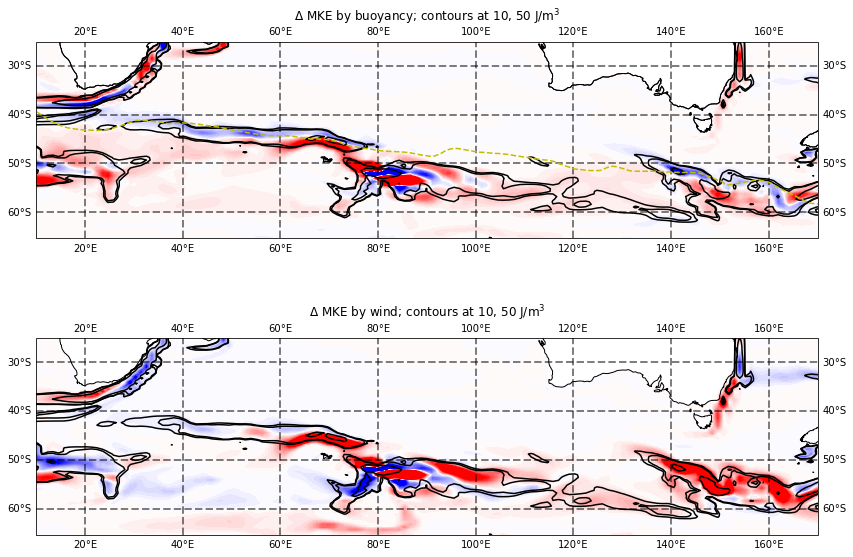

In [18]:
# CESM MKE change plots - pretty nice! 

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14,10), subplot_kw={'projection': ccrs.PlateCarree()}) 
#ax = plt.axes(projection=ccrs.PlateCarree())
axs[0].coastlines()

lats = -65 # write these between -90 and 90
latn = -25  

lonw = -20 #write these between 0 and 360, sorry!
lone = 180

depth = 1800

vm = 0.05
vmT = 3
vmc = 0.2
nlev = 15 # number of contours of the mean circulation

um = 4
#fig.suptitle(mlist[mnum]+' output zonal average, '+str(lonw)+' - '+str(lone)+' E')




# pick actual latitudes
lonmax = [80, 360, 360, 360, 360]
lonmin = [-280, 0, 0,0,0]



# coords for Matt's Taulock code
matlats = tau4_um_4.TLAT[:,0]
matlatc = np.arange(np.argmin(np.abs(np.array(matlats-lats)))-1, np.argmin(np.abs(np.array(matlats-latn)))+1)
matlons = tau4_um_4.TLONG[0,:]
matlonc = np.concatenate([np.arange(37,200),np.arange(0,35)])
#matlonc = np.arange(np.argmin(np.abs(np.array(matlons-lonw))), np.argmin(np.abs(np.array(matlons-lone))))
matdepc = np.arange(0, 1+np.argmin(np.abs(np.array(tau4_um_4.z_t/100-depth))))



#depf = [-1, -1, -1, -1, -0.01]
#yy, zz = np.meshgrid(latfile[mylat,0],  depf[mnum]* depfile[regdep])
#yy2, zz2 = np.meshgrid(latfile[np.arange(lats,latn-1),0],  depf[mnum]* depfile[regdep])

#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)

plt.set_cmap('bwr')


tau1_mke_4 = tau1_um_4[matdepc,matlatc, matlonc]**2 + tau1_vm_4[matdepc,matlatc, matlonc]**2
tau4_mke_4 = tau4_um_4[matdepc,matlatc, matlonc]**2 + tau4_vm_4[matdepc,matlatc, matlonc]**2
cont_mke_4 = cont_um_4[matdepc,matlatc, matlonc]**2 + cont_vm_4[matdepc,matlatc, matlonc]**2

tau1_mke_4 = 0.5*1035*0.0001*tau1_mke_4
tau4_mke_4 = 0.5*1035*0.0001*tau4_mke_4
cont_mke_4 = 0.5*1035*0.0001*cont_mke_4

# use isel ... ideally.
plt.set_cmap("bwr")

clev=[0.015, 0.02,0.1] #
myclev = [x*500 for x in clev]
idep = np.arange(0,15)
Dticks = np.linspace(-15,15, 51, endpoint=True)
C = axs[0].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_mke_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
C2 = axs[1].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_mke_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
D = axs[0].contourf(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau1_mke_4.isel(z_t=idep).mean('z_t') - cont_mke_4.isel(z_t=idep).mean('z_t'), levels=Dticks, extend='both', )
D2 = axs[1].contourf(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau4_mke_4.isel(z_t=idep).mean('z_t') - cont_mke_4.isel(z_t=idep).mean('z_t'), levels=Dticks, extend='both', )

axs[0].plot(ARCSAF_x, ARCSAF_y, 'y--')

for i in np.arange(0,2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
    axs[i].set_xlim([10,170])
   
#cbc = plt.colorbar(D, ticks = Dticks,shrink = 0.6)
#cbc.set_ticks(np.linspace(-15,15, 11, endpoint=True))
#cbc.ax.tick_params(labelsize=12)
#
#cbc2 = plt.colorbar(D2, ticks = Dticks,shrink = 0.6)
#cbc2.set_ticks(np.linspace(-15,15, 11, endpoint=True))
#cbc2.ax.tick_params(labelsize=12)
    
    
axs[0].coastlines()
axs[1].coastlines()

axs[0].set_title('$\Delta$ MKE by buoyancy; contours at 10, 50 J/m$^3$')
axs[1].set_title('$\Delta$ MKE by wind; contours at 10, 50 J/m$^3$')
#fig.colorbar(A, ax=axs[0,0])
#fig.colorbar(B, ax=axs[0,1])

#fig.colorbar(D, ax=axs[1,1])
#fig.colorbar(ALL, ax=axs.ravel().tolist()) # actually no because they're all different models!!!
#



#ax.tick_params(labelsize= 20, direction='in')
plt.grid()# width = 2, length = 7, right=1, top=1,labelleft=1, labelright=0, labelbottom=1)
cbc.set_label(label = 'J/m$^3$', size=14)
#plt.savefig('SISAZ_figures/CESM_tau1-cont_mke_circumpolar_1110_aviso.eps')


In [ ]:
# a good challenge for today is to make this for CanESM? 
# also would it be weird to pull the ARC-SAF and then let that be saved? 

In [164]:
# random adventure to get the 30-40 data successfully averaged. 
# probably takes only a minute or two to do what we need to. First, find the file location, open as an xr. 
# then seriously just average. 
# and save again as an xr.to_netcdf. 
folder3 = 'TauLockMeans/'
#
#tst = xr.open_dataset('/nfs/data/TAULOCK_mluongo/Tau4CO2x1/ocn/'+ 'Tau4CO2x1.pop.h.VVEL.003001-003912.nc')
#tau4_vm_3 = tst.VVEL.mean('time')
#
##ClimAbrupt4xCO2
#
#tau4_vm_3.to_netcdf(folder3+'tau4_vm_3.nc')



In [175]:
#tst = xr.open_dataset('/nfs/data/TAULOCK_mluongo/Tau2CO2x1/'+ 'Tau2CO2x1.pop.h.VVEL.004001-004912.nc')
#tau2c1_vm_4 = tst.VVEL.mean('time')
#
##ClimAbrupt4xCO2
#
#tau2c1_vm_4.to_netcdf(folder3+'tau2c1_vm_4.nc')

In [167]:
#tst3 = xr.open_dataset('/nfs/data/TAULOCK_mluongo/ClimAbrupt4xCO2/ocn/'+ 'ClimAbrupt4xCO2.pop.h.TEMP.003001-003912.nc')
#coup4_tm_3 = tst3.TEMP.mean('time')
#
##ClimAbrupt4xCO2
#
#coup4_tm_3.to_netcdf(folder3+'coup4_tm_3.nc')

In [235]:
tst4 = xr.open_dataset('/nfs/data/TAULOCK_mluongo/Tau1S1b/ocn/VVEL/'+ 'Tau1S1b.pop.h.VVEL.004001-004912.nc')
contL_vm_4 = tst4.VVEL.mean('time')
#
#
contL_vm_4.to_netcdf(folder3+'contL_vm_4.nc')

MemoryError: Unable to allocate 3.30 GiB for an array with shape (120, 60, 384, 320) and data type float32

In [174]:
#tst2 = xr.open_dataset('/nfs/data/TAULOCK_mluongo/Tau1CO2x2/'+ 'Tau1CO2x2.pop.h.VVEL.004001-004912.nc')
#
#tau1c2_vm_4 = tst2.VVEL.mean('time')
#
#tau1c2_vm_4.to_netcdf(folder3+'tau1c2_vm_4.nc')

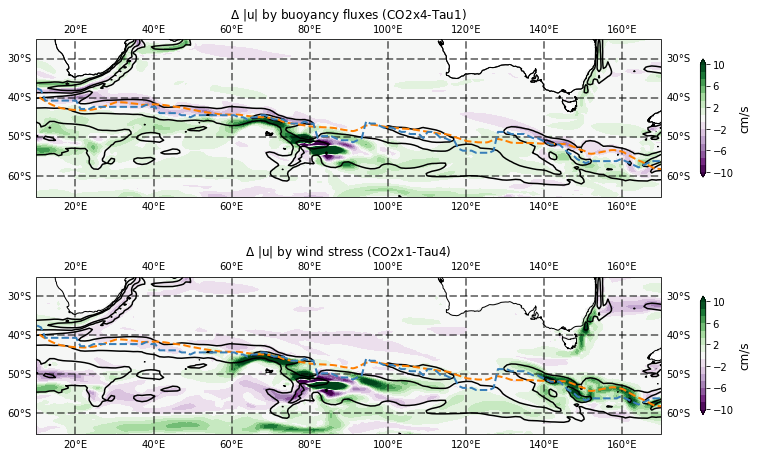

In [388]:
# CESM MKE change plots - pretty nice! 

# Ok this just started glitching and I'm not sure why! Interesting though. 

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14,8), subplot_kw={'projection': ccrs.PlateCarree()}) 
#ax = plt.axes(projection=ccrs.PlateCarree())
axs[0].coastlines()

lats = -65 # write these between -90 and 90
latn = -25  

lonw = -20 #write these between 0 and 360, sorry!
lone = 180

depth = 200

vm = 0.05
vmT = 3
vmc = 0.2
nlev = 15 # number of contours of the mean circulation

um = 4
#fig.suptitle(mlist[mnum]+' output zonal average, '+str(lonw)+' - '+str(lone)+' E')




# pick actual latitudes
lonmax = [80, 360, 360, 360, 360]
lonmin = [-280, 0, 0,0,0]



# coords for Matt's Taulock code
matlats = tau4_um_4.TLAT[:,0]
matlatc = np.arange(np.argmin(np.abs(np.array(matlats-lats)))-1, np.argmin(np.abs(np.array(matlats-latn)))+1)
matlons = tau4_um_4.TLONG[0,:]
matlonc = np.arange(37,200)#,np.arange(0,35)])
#matlonc = np.arange(np.argmin(np.abs(np.array(matlons-lonw))), np.argmin(np.abs(np.array(matlons-lone))))
matdepc = np.arange(0, 1+np.argmin(np.abs(np.array(tau4_um_4.z_t/100-depth))))



#depf = [-1, -1, -1, -1, -0.01]
#yy, zz = np.meshgrid(latfile[mylat,0],  depf[mnum]* depfile[regdep])
#yy2, zz2 = np.meshgrid(latfile[np.arange(lats,latn-1),0],  depf[mnum]* depfile[regdep])

#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)

plt.set_cmap('PRGn')


tau1_speed_4 = (tau1_um_4[matdepc,matlatc, matlonc]**2 + tau1_vm_4[matdepc,matlatc, matlonc]**2)**0.5
tau4_speed_4 = (tau4_um_4[matdepc,matlatc, matlonc]**2 + tau4_vm_4[matdepc,matlatc, matlonc]**2)**0.5
cont_speed_4 = (cont_um_4[matdepc,matlatc, matlonc]**2 + cont_vm_4[matdepc,matlatc, matlonc]**2)**0.5

#tau1_mke_4 = 0.5*1035*0.0001*tau1_mke_4
#tau4_mke_4 = 0.5*1035*0.0001*tau4_mke_4
#cont_mke_4 = 0.5*1035*0.0001*cont_mke_4

# use isel ... ideally.


clev=[2,10] #
myclev = [10,30]
idep = np.arange(0,15) # oh interesting, just the top 15 levels? what are these? 
Dticks = np.linspace(-10,10, 16, endpoint=True)
tick_print = np.linspace(-10,10, 6, endpoint=True)
C = axs[0].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
C2 = axs[1].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
D = axs[0].contourf(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau1_speed_4.isel(z_t=idep).mean('z_t') - cont_speed_4.isel(z_t=idep).mean('z_t'), levels=Dticks, extend='both', )
D2 = axs[1].contourf(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau4_speed_4.isel(z_t=idep).mean('z_t') - cont_speed_4.isel(z_t=idep).mean('z_t'), levels=Dticks, extend='both', )

axs[0].plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth=2)
axs[0].plot(matlons[matlonc], CESM1_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)
axs[1].plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth=2)
axs[1].plot(matlons[matlonc], CESM1_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)

ax.plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth = 2)
ax.plot(lonfile[0,mylon], pl_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)

for i in np.arange(0,2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
    axs[i].set_xlim([10,170])
   
cbc = plt.colorbar(D,ax= axs[0], ticks = tick_print, shrink = 0.6)
cbc2 = plt.colorbar(D2,ax= axs[1], ticks = tick_print, shrink = 0.6)
    
axs[0].coastlines()
axs[1].coastlines()

axs[0].set_title('$\Delta$ |u| by buoyancy fluxes (CO2x4-Tau1)') 
axs[1].set_title('$\Delta$ |u| by wind stress (CO2x1-Tau4)')
#fig.colorbar(A, ax=axs[0,0])
#fig.colorbar(B, ax=axs[0,1])

#fig.colorbar(D, ax=axs[1,1])
#fig.colorbar(ALL, ax=axs.ravel().tolist()) # actually no because they're all different models!!!
#


CESMlon = tau4_um_4.TLONG[0,matlonc]
CESMlat = tau4_um_4.TLAT[matlatc,0]
CESMcsp = cont_speed_4.isel(z_t=idep).mean('z_t')
CESMdsp = tau1_speed_4.isel(z_t=idep).mean('z_t') - CESMcsp
CESMdsp2 = tau4_speed_4.isel(z_t=idep).mean('z_t') - CESMcsp



#ax.tick_params(labelsize= 20, direction='in')
plt.grid()# width = 2, length = 7, right=1, top=1,labelleft=1, labelright=0, labelbottom=1)
cbc.set_label(label = 'cm/s', size=12)
cbc2.set_label(label = 'cm/s', size=12)
#plt.savefig('SISAZ_figures/Taulock_speedmap_5_2.eps')


In [32]:
## Here I'm going to try to create an ARC-SAF-like contour for CESM1. 

# grab the argmax within a range around the ARC-SAF. 

# will only work for the range of matlonc

init_ARCSAF_y = np.interp(matlons[matlonc], ARCSAF_x, ARCSAF_y) 
CESM1_ARCSAF_y = 0*init_ARCSAF_y
CESM1_ARCSAF_co = 0*init_ARCSAF_y

speed = cont_speed_4.isel(z_t=idep).mean('z_t')
dif = 5

for i in np.arange(len(matlonc)):
    AS_co = np.argmin(np.abs(init_ARCSAF_y[i] - np.array(matlats[matlatc])))
    CESM1_ARCSAF_co[i] = np.argmax(np.array(speed[AS_co-dif:AS_co+dif,i]))
    CESM1_ARCSAF_co[i] = CESM1_ARCSAF_co[i] + AS_co-dif
    CESM1_ARCSAF_y[i] =  matlats[int(matlatc[0] +CESM1_ARCSAF_co[i])]
    
## Ok that basically works. 
    
    
    

In [142]:
np.argmax(np.array(speed[AS_co-dif:AS_co+dif,i]))

7

In [178]:
np.savez('CESM1_ARCSAF.npz', CESM1_ARCSAF_y = CESM1_ARCSAF_y, CESM1_ARCSAF_co = CESM1_ARCSAF_co, lat_co= matlatc, lon_co = matlonc, CanESM_x = matlons[matlonc])

In [288]:
pl_cont_mke

<xarray.DataArray (j: 60, i: 160)>
array([[0.00498609, 0.00487582, 0.00515788, ..., 0.01238118, 0.01724216,
        0.01991638],
       [0.00552943, 0.00581106, 0.00638107, ..., 0.02353575, 0.02715624,
        0.02758457],
       [0.00650811, 0.00699889, 0.00767503, ..., 0.03767818, 0.03739679,
        0.03450423],
       ...,
       [0.02302454, 0.01401015, 0.00634842, ..., 0.03253658, 0.02946894,
        0.0272308 ],
       [0.01604114, 0.00861865, 0.00585126, ..., 0.01992878, 0.0172667 ,
        0.01487913],
       [0.00899309, 0.0041952 , 0.01154508, ..., 0.0038759 , 0.00206558,
        0.00256182]], dtype=float32)
Coordinates:
    lev      float64 191.1
  * j        (j) int32 45 46 47 48 49 50 51 52 ... 97 98 99 100 101 102 103 104
  * i        (i) int32 296 297 298 299 300 301 302 303 ... 89 90 91 92 93 94 95

In [292]:
# I think my averages are too deep here!
regdep

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

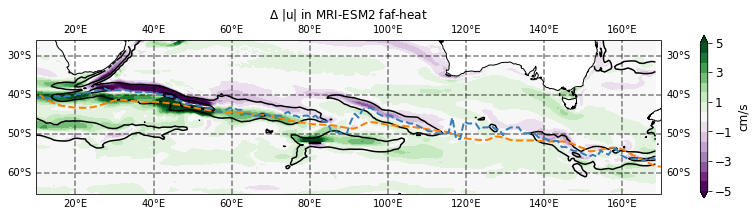

In [377]:
# Speed map for an arbitrary model!

# Seeing what I can do with surface MKE maps - first priority is to check CESM
 # experiment. 

mnum = 2 # 0 = GFDL2 1 = MIROC, 2 = MRI, 3 = CanESM, 4 = CESM
mlist = [ "GFDL","MIROC","MRI","CanESM","CESM"]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.set_cmap('PRGn')


lats = -65 # write these between -90 and 90
latn = -25  

lonw = 10 #write these between 0 and 360, sorry!
lone = 170

depth = 200

vm = 0.05
vmT = 3
vmc = 0.2
nlev = 15 # number of contours of the mean circulation

um = 4
#fig.suptitle(mlist[mnum]+' output zonal average, '+str(lonw)+' - '+str(lone)+' E')

foldern = 'Jan22means/'
# seems like the best way to do this is to have a dictionary. Probably one dictionary for each model. This will require thinking!
# likely it's not that bad. For a start, you can write a simple code just to pull them from files! 
#Then make the dictionary when you rewrite the read from file codes to make them efficient
pl_heat_u = xr.open_dataarray(foldern + mlist[mnum]+'_heat_u.nc')
pl_heat_v = xr.open_dataarray(foldern + mlist[mnum]+'_heat_v.nc')
#pl_heat_theta = xr.open_dataarray(foldern + mlist[mnum]+'_heat_theta.nc')
#pl_heat_pass = xr.open_dataarray(foldern + mlist[mnum]+'_heat_pass.nc')
#pl_heat_sal = xr.open_dataarray(foldern + mlist[mnum]+'_heat_sal.nc')
pl_cont_u = xr.open_dataarray(foldern + mlist[mnum]+'_cont_u.nc')
pl_cont_v = xr.open_dataarray(foldern + mlist[mnum]+'_cont_v.nc')
#pl_cont_pass = xr.open_dataarray(foldern + mlist[mnum]+'_cont_pass.nc')
#pl_cont_sal = xr.open_dataarray(foldern + mlist[mnum]+'_cont_sal.nc')
#pl_cont_theta = xr.open_dataarray(foldern + mlist[mnum]+'_cont_theta.nc')

# to do it everywhere else (??) we need to mean the meridional velocities. whew another day. 
# in other runs you mean? 

if mnum==0:
    lonfile = pl_heat_theta.lon
    latfile = pl_heat_theta.lat
    depfile = pl_heat_theta.lev
    #pl_cont_sig0 = gsw.sigma0(pl_cont_sal, pl_cont_theta)
    
    
elif mnum in (1,2,3): 
    lonfile = pl_cont_u.longitude
    latfile = pl_cont_u.latitude
    depfile = pl_cont_u.lev
    #pl_cont_sig0 = gsw.sigma0(pl_cont_sal, pl_cont_theta)
    #if mnum==1: # better solution once I make a dictionary
        #pl_cont_sig0 = MIROC_cont_sig0
    #else:
        #pl_cont_sig0 = 0*MIROC_cont_sig0
    
elif mnum ==4:
    lonfile = pl_cont_u.lon
    latfile = pl_cont_u.lat
    depfile = pl_cont_u.lev
    
    #pl_cont_sig0 = 0*MIROC_cont_sig0


# pick actual latitudes
lonmax = [80, 360, 360, 360, 360]
lonmin = [-280, 0, 0,0,0]


if lone>lonmax[mnum]:
    lone = lone - 360
if lone<lonmin[mnum]:
    lone = lone + 360
    
if lonw>lonmax[mnum]:
    lonw = lonw - 360
if lonw<lonmin[mnum]:
    lonw = lonw + 360
    
lonecd = np.argmin(np.abs(np.array(lone - lonfile[0,:])))
lonwcd = np.argmin(np.abs(np.array(lonw - lonfile[0,:])))  
latncd = np.argmin(np.abs(np.array(latn - latfile[:,0])))
latscd = np.argmin(np.abs(np.array(lats - latfile[:,0])))

if lonwcd>lonecd:
    lonwcd = lonwcd-len(lonfile[0,:])

mylat = np.arange(latscd,latncd)
mylon = np.arange(lonwcd,lonecd)

#idealdepth = [40, 48, 48, 30, 46]
#regdep = np.arange(0,idealdepth[mnum])
regdep =  np.arange(0,np.argmin(np.abs(np.array(depth - depfile))))

depf = [-1, -1, -1, -1, -0.01]
#yy, zz = np.meshgrid(latfile[mylat,0],  depf[mnum]* depfile[regdep])
#yy2, zz2 = np.meshgrid(latfile[np.arange(lats,latn-1),0],  depf[mnum]* depfile[regdep])

#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)


#tau1_uplt_4 = tau1_um_4[matdepc,matlatc, matlonc].mean(dim='nlon')
#cont_uplt_4 = cont_um_4[matdepc,matlatc, matlonc].mean(dim='nlon')
pl_cont_mke = (pl_cont_u[regdep,mylat,mylon]**2 + pl_cont_v[regdep,mylat,mylon]**2)**0.5
pl_heat_mke = (pl_heat_u[regdep,mylat,mylon]**2 + pl_heat_v[regdep,mylat,mylon]**2)**0.5
#_mke = cont_um_4[matdepc,matlatc, matlonc]**2 + cont_vm_4[matdepc,matlatc, matlonc]**2

pl_cont_mke_z = np.mean(pl_cont_mke,0) 
pl_heat_mke_z = np.mean(pl_heat_mke,0) 


# use isel ... ideally.
#clev=[0.02,0.1]
myclev = [10,30]
Dticks = np.linspace(-5,5, 16, endpoint=True)
C = ax.contour(lonfile[0, mylon ],latfile[mylat,0], pl_cont_mke_z*100, levels=myclev, colors='k')
D = ax.contourf(lonfile[0,mylon],latfile[mylat,0], (pl_heat_mke_z- pl_cont_mke_z)*100, levels=Dticks,  extend='both')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
#E = ax.contour(u_autu.longitude,u_autu.latitude.isel(latitude=lati), mke_mean.isel(latitude=lati), levels=[20,100], colors='green')

a3 = np.load('MRI_ARCSAF.npz')
pl_ARCSAF_y = a3['MRI_ARCSAF_y']
ARCSAF_xco = a3['lon_co']
ax.plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth = 2)
ax.plot(lonfile[0,mylon], pl_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)
ax.set_xlim([10,170])

#plt.clim([-2,2])

MRIlon = lonfile[0, mylon ]
MRIlat = latfile[mylat,0]
MRIcsp = pl_cont_mke_z*100
MRIdsp = (pl_heat_mke_z- pl_cont_mke_z)*100

plt.title('$\Delta$ |u| in MRI-ESM2 faf-heat')
#fig.colorbar(A, ax=axs[0,0])
#fig.colorbar(B, ax=axs[0,1])
cbc = plt.colorbar(D, ticks = Dticks,shrink = 0.6)
#fig.colorbar(D, ax=axs[1,1])
#fig.colorbar(ALL, ax=axs.ravel().tolist()) # actually no because they're all different models!!!
#
cbc.set_ticks(np.linspace(-5,5, 6, endpoint=True))
cbc.ax.tick_params(labelsize=12)

gl.ylocator = mticker.FixedLocator([-60, -50, -40, -30])
#ax.tick_params(labelsize= 20, direction='in')
plt.grid()# width = 2, length = 7, right=1, top=1,labelleft=1, labelright=0, labelbottom=1)
cbc.set_label(label = 'cm/s', size=12)

#plt.savefig('SISAZ_figures/MRI_faf-heat_speedmap_v3.eps')



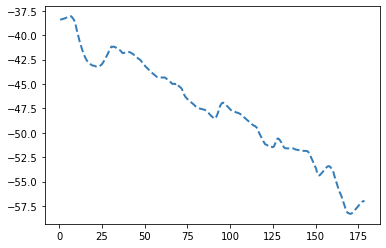

In [357]:

plt.plot(ARCSAF_x, ARCSAF_y, '--',color = '#377eb8', linewidth = 2)

In [376]:
#np.savez('CanESM_ARCSAF.npz', CanESM_ARCSAF_y = pl_ARCSAF_y, CanESM_ARCSAF_co = pl_ARCSAF_co, lat_co= mylat, lon_co =mylon, CanESM_x = pl_lon)
np.savez('MRI_ARCSAF.npz', MRI_ARCSAF_y = pl_ARCSAF_y, MRI_ARCSAF_co = pl_ARCSAF_co, lat_co= mylat, lon_co =mylon, MRI_x = pl_lon)
         
         
         

In [24]:
pl_cont_u.x

<xarray.DataArray 'x' (x: 360)>
array([-279., -278., -277., ...,   78.,   79.,   80.])
Coordinates:
  * x        (x) float64 -279.0 -278.0 -277.0 -276.0 ... 77.0 78.0 79.0 80.0
Attributes:
    long_name:       ucell longitude
    units:           degrees_E
    axis:            X
    standard_name:   grid_longitude
    cartesian_axis:  X

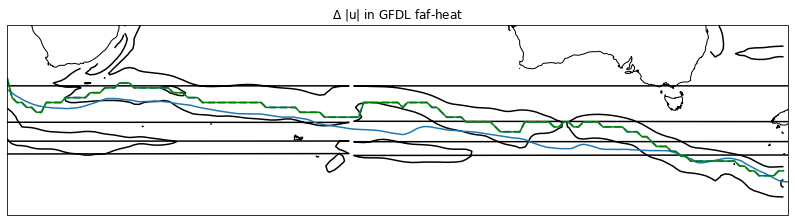

In [96]:
# Speed map for an arbitrary model! Here GFDL
 

mnum = 0 # 0 = GFDL2 1 = MIROC, 2 = MRI, 3 = CanESM, 4 = CESM
mlist = [ "GFDL","MIROC","MRI","CanESM","CESM"]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.set_cmap('PRGn')


lats = -65 # write these between -90 and 90
latn = -25  

lonw = 10 #write these between 0 and 360, sorry!
lone = 170

depth = 200

vm = 0.05
vmT = 3
vmc = 0.2
nlev = 15 # number of contours of the mean circulation

um = 4
#fig.suptitle(mlist[mnum]+' output zonal average, '+str(lonw)+' - '+str(lone)+' E')

foldern = 'Jan22means/'
# seems like the best way to do this is to have a dictionary. Probably one dictionary for each model. This will require thinking!
# likely it's not that bad. For a start, you can write a simple code just to pull them from files! 
#Then make the dictionary when you rewrite the read from file codes to make them efficient
pl_heat_u = xr.open_dataarray(foldern + mlist[mnum]+'_heat_u.nc')
pl_heat_v = xr.open_dataarray(foldern + mlist[mnum]+'_heat_v.nc')
#pl_heat_theta = xr.open_dataarray(foldern + mlist[mnum]+'_heat_theta.nc')
#pl_heat_pass = xr.open_dataarray(foldern + mlist[mnum]+'_heat_pass.nc')
#pl_heat_sal = xr.open_dataarray(foldern + mlist[mnum]+'_heat_sal.nc')
pl_cont_u = xr.open_dataarray(foldern + mlist[mnum]+'_cont_u.nc')
pl_cont_v = xr.open_dataarray(foldern + mlist[mnum]+'_cont_v.nc')
#pl_cont_pass = xr.open_dataarray(foldern + mlist[mnum]+'_cont_pass.nc')
#pl_cont_sal = xr.open_dataarray(foldern + mlist[mnum]+'_cont_sal.nc')
#pl_cont_theta = xr.open_dataarray(foldern + mlist[mnum]+'_cont_theta.nc')

# to do it everywhere else (??) we need to mean the meridional velocities. whew another day. 
# in other runs you mean? 

if mnum==0:
    lonfile = pl_heat_u.x
    latfile = pl_heat_u.y
    depfile = pl_heat_u.lev
    #pl_cont_sig0 = gsw.sigma0(pl_cont_sal, pl_cont_theta)
    
    
elif mnum in (1,2,3): 
    lonfile = pl_cont_u.longitude
    latfile = pl_cont_u.latitude
    depfile = pl_cont_u.lev
    #pl_cont_sig0 = gsw.sigma0(pl_cont_sal, pl_cont_theta)
    #if mnum==1: # better solution once I make a dictionary
        #pl_cont_sig0 = MIROC_cont_sig0
    #else:
        #pl_cont_sig0 = 0*MIROC_cont_sig0
    
elif mnum ==4:
    lonfile = pl_cont_u.lon
    latfile = pl_cont_u.lat
    depfile = pl_cont_u.lev
    
    #pl_cont_sig0 = 0*MIROC_cont_sig0


# pick actual latitudes
lonmax = [80, 360, 360, 360, 360]
lonmin = [-280, 0, 0,0,0]


if lone>lonmax[mnum]:
    lone = lone - 360
if lone<lonmin[mnum]:
    lone = lone + 360
    
if lonw>lonmax[mnum]:
    lonw = lonw - 360
if lonw<lonmin[mnum]:
    lonw = lonw + 360
    
lonecd = np.argmin(np.abs(np.array(lone - lonfile)))
lonwcd = np.argmin(np.abs(np.array(lonw - lonfile)))  
latncd = np.argmin(np.abs(np.array(latn - latfile)))
latscd = np.argmin(np.abs(np.array(lats - latfile)))

if lonwcd>lonecd:
    lonwcd = lonwcd-len(lonfile)

mylat = np.arange(latscd,latncd)
mylon = np.arange(lonwcd,lonecd)

#idealdepth = [40, 48, 48, 30, 46]
#regdep = np.arange(0,idealdepth[mnum])
regdep =  np.arange(0,np.argmin(np.abs(np.array(depth - depfile))))

depf = [-1, -1, -1, -1, -0.01]

pl_cont_mke = (pl_cont_u[regdep,mylat,mylon]**2 + pl_cont_v[regdep,mylat,mylon]**2)**0.5
pl_heat_mke = (pl_heat_u[regdep,mylat,mylon]**2 + pl_heat_v[regdep,mylat,mylon]**2)**0.5
#_mke = cont_um_4[matdepc,matlatc, matlonc]**2 + cont_vm_4[matdepc,matlatc, matlonc]**2

pl_cont_mke_z = np.mean(pl_cont_mke,0) 
pl_heat_mke_z = np.mean(pl_heat_mke,0) 


# use isel ... ideally.
#clev=[0.02,0.1]
myclev = [10,30]
Dticks = np.linspace(-5,5, 16, endpoint=True)
C = ax.contour(lonfile[mylon ],latfile[mylat], pl_cont_mke_z*100, levels=myclev, colors='k')
#D = ax.contourf(lonfile[mylon],latfile[mylat], (pl_heat_mke_z- pl_cont_mke_z)*100, levels=Dticks,  extend='both')
#gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
#E = ax.contour(u_autu.longitude,u_autu.latitude.isel(latitude=lati), mke_mean.isel(latitude=lati), levels=[20,100], colors='green')

a3 = np.load('GFDL_ARCSAF.npz')
pl_ARCSAF_y2 = a3['GFDL_ARCSAF_y']
#ARCSAF_xco = a3['lon_co']
pl_x = a3['GFDL_x']
#ax.plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth = 2)
ax.plot(pl_x, pl_ARCSAF_y2, '--', color = '#377eb8', linewidth = 2)
ax.set_xlim([10,170])

a = np.load('ARC-SAF_coords.npz')
ARCSAF_x = a['ARCSAF_x']
ARCSAF_y = a['ARCSAF_y']
plt.plot(ARCSAF_x, ARCSAF_y)

plt.title('$\Delta$ |u| in GFDL faf-heat')
#fig.colorbar(A, ax=axs[0,0])
#fig.colorbar(B, ax=axs[0,1])
#cbc = plt.colorbar(D, ticks = Dticks,shrink = 0.6)
#fig.colorbar(D, ax=axs[1,1])
#fig.colorbar(ALL, ax=axs.ravel().tolist()) # actually no because they're all different models!!!
#
#cbc.set_ticks(np.linspace(-5,5, 6, endpoint=True))
#cbc.ax.tick_params(labelsize=12)
plt.plot(np.arange(10,170),pl_ARCSAF_y, 'green')
#gl.ylocator = mticker.FixedLocator([-60, -50, -40, -30])
#ax.tick_params(labelsize= 20, direction='in')
plt.grid()# width = 2, length = 7, right=1, top=1,labelleft=1, labelright=0, labelbottom=1)
#cbc.set_label(label = 'cm/s', size=12)

#plt.savefig('SISAZ_figures/MRI_faf-heat_speedmap_v3.eps')



In [95]:

#init_ARCSAF_y

#np.savez('CanESM_ARCSAF.npz', CanESM_ARCSAF_y = pl_ARCSAF_y, CanESM_ARCSAF_co = pl_ARCSAF_co, lat_co= mylat, lon_co =mylon, CanESM_x = pl_lon)
#np.savez('MRI_ARCSAF.npz', MRI_ARCSAF_y = pl_ARCSAF_y, MRI_ARCSAF_co = pl_ARCSAF_co, lat_co= mylat, lon_co =mylon, MRI_x = pl_lon)
np.savez('GFDL_ARCSAF.npz', GFDL_ARCSAF_y = pl_ARCSAF_y, GFDL_ARCSAF_co = pl_ARCSAF_co, lat_co= mylat, lon_co =mylon, GFDL_x = np.arange(10,170))
         

In [93]:
# another attempt at a general contour for FAFMIP output 

# Ok I want to make this work initially for GFDL. That seems plausible
# If I definitely want to be able to GFDL's mean speed and the two contours. 

## here for GFDL ## there is still a small error around 80-90, but it's pretty good. ARC-SAF is highly coherent!


#lonfile[mylon] gets funky with the x going negative
# Need to just use GFDL_x for the coordinate honestly, otherwise it complains. 
init_ARCSAF_y = np.interp(np.arange(10,170), ARCSAF_x, ARCSAF_y) 
pl_ARCSAF_y = 0*init_ARCSAF_y
pl_ARCSAF_co = 0*init_ARCSAF_y
#speed = cont_speed_4.isel(z_t=idep).mean('z_t')
dif=1
difu = 7

for i in np.arange(len(mylon)):
    AS_co = np.argmin(np.abs(init_ARCSAF_y[i] - np.array(latfile[mylat])))
    if i>20:
        difu=7
    if i<20: # adjustment so ARC-SAF doesnt' jump to Agulhas return current near Africa.
        difu=3
    pl_ARCSAF_co[i] = np.argmax(np.array(pl_cont_mke_z[AS_co-dif:AS_co+difu,i]))
    pl_ARCSAF_co[i] = pl_ARCSAF_co[i] + AS_co-dif
    pl_ARCSAF_y[i] =  latfile[int(mylat[0] +pl_ARCSAF_co[i])]
    
## Ok that basically works. 
    

In [174]:
#pl_lon = lonfile[0,mylon]

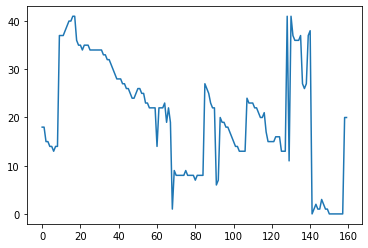

In [121]:
## can we get a decent contour for each one? basically it's the max|u| approach ... but we need some boundaries. 
#tst = np.array(pl_cont_mke_z)
#a = np.argmax(tst[18:60,:],axis=0)#a = np.argmax(tst axis = 0)
#plt.plot(a)

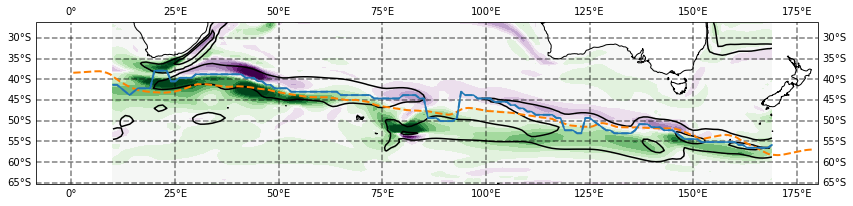

In [102]:
# Speed map for an arbitrary model! MIROC here.

# Seeing what I can do with surface MKE maps - first priority is to check CESM
 # experiment. 

mnum = 1 # 0 = GFDL2 1 = MIROC, 2 = MRI, 3 = CanESM, 4 = CESM
mlist = [ "GFDL","MIROC","MRI","CanESM","CESM"]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.set_cmap('PRGn')


lats = -65 # write these between -90 and 90
latn = -25  

lonw = 10 #write these between 0 and 360, sorry!
lone = 170

depth = 200

vm = 0.05
vmT = 3
vmc = 0.2
nlev = 15 # number of contours of the mean circulation

um = 4
#fig.suptitle(mlist[mnum]+' output zonal average, '+str(lonw)+' - '+str(lone)+' E')

foldern = 'Jan22means/'
# seems like the best way to do this is to have a dictionary. Probably one dictionary for each model. This will require thinking!
# likely it's not that bad. For a start, you can write a simple code just to pull them from files! 
#Then make the dictionary when you rewrite the read from file codes to make them efficient
pl_heat_u = xr.open_dataarray(foldern + mlist[mnum]+'_heat_u.nc')
pl_heat_v = xr.open_dataarray(foldern + mlist[mnum]+'_heat_v.nc')
#pl_heat_theta = xr.open_dataarray(foldern + mlist[mnum]+'_heat_theta.nc')
#pl_heat_pass = xr.open_dataarray(foldern + mlist[mnum]+'_heat_pass.nc')
#pl_heat_sal = xr.open_dataarray(foldern + mlist[mnum]+'_heat_sal.nc')
pl_cont_u = xr.open_dataarray(foldern + mlist[mnum]+'_cont_u.nc')
pl_cont_v = xr.open_dataarray(foldern + mlist[mnum]+'_cont_v.nc')
#pl_cont_pass = xr.open_dataarray(foldern + mlist[mnum]+'_cont_pass.nc')
#pl_cont_sal = xr.open_dataarray(foldern + mlist[mnum]+'_cont_sal.nc')
#pl_cont_theta = xr.open_dataarray(foldern + mlist[mnum]+'_cont_theta.nc')

# to do it everywhere else (??) we need to mean the meridional velocities. whew another day. 
# in other runs you mean? 

if mnum==0:
    lonfile = pl_heat_theta.lon
    latfile = pl_heat_theta.lat
    depfile = pl_heat_theta.lev
    #pl_cont_sig0 = gsw.sigma0(pl_cont_sal, pl_cont_theta)
    
    
elif mnum in (1,2,3): 
    lonfile = pl_cont_u.longitude
    latfile = pl_cont_u.latitude
    depfile = pl_cont_u.lev
    #pl_cont_sig0 = gsw.sigma0(pl_cont_sal, pl_cont_theta)
    #if mnum==1: # better solution once I make a dictionary
        #pl_cont_sig0 = MIROC_cont_sig0
    #else:
        #pl_cont_sig0 = 0*MIROC_cont_sig0
    
elif mnum ==4:
    lonfile = pl_cont_u.lon
    latfile = pl_cont_u.lat
    depfile = pl_cont_u.lev
    
    #pl_cont_sig0 = 0*MIROC_cont_sig0


# pick actual latitudes
lonmax = [80, 360, 360, 360, 360]
lonmin = [-280, 0, 0,0,0]


if lone>lonmax[mnum]:
    lone = lone - 360
if lone<lonmin[mnum]:
    lone = lone + 360
    
if lonw>lonmax[mnum]:
    lonw = lonw - 360
if lonw<lonmin[mnum]:
    lonw = lonw + 360
    
lonecd = np.argmin(np.abs(np.array(lone - lonfile[0,:])))
lonwcd = np.argmin(np.abs(np.array(lonw - lonfile[0,:])))  
latncd = np.argmin(np.abs(np.array(latn - latfile[:,0])))
latscd = np.argmin(np.abs(np.array(lats - latfile[:,0])))

if lonwcd>lonecd:
    lonwcd = lonwcd-len(lonfile[0,:])

mylat = np.arange(latscd,latncd)
mylon = np.arange(lonwcd,lonecd)

#idealdepth = [40, 48, 48, 30, 46]
#regdep = np.arange(0,idealdepth[mnum])
regdep =  np.arange(0,np.argmin(np.abs(np.array(depth - depfile))))

depf = [-1, -1, -1, -1, -0.01]
#yy, zz = np.meshgrid(latfile[mylat,0],  depf[mnum]* depfile[regdep])
#yy2, zz2 = np.meshgrid(latfile[np.arange(lats,latn-1),0],  depf[mnum]* depfile[regdep])

#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)


#tau1_uplt_4 = tau1_um_4[matdepc,matlatc, matlonc].mean(dim='nlon')
#cont_uplt_4 = cont_um_4[matdepc,matlatc, matlonc].mean(dim='nlon')
pl_cont_mke = (pl_cont_u[regdep,mylat,mylon]**2 + pl_cont_v[regdep,mylat,mylon]**2)**0.5
pl_heat_mke = (pl_heat_u[regdep,mylat,mylon]**2 + pl_heat_v[regdep,mylat,mylon]**2)**0.5
#_mke = cont_um_4[matdepc,matlatc, matlonc]**2 + cont_vm_4[matdepc,matlatc, matlonc]**2

pl_cont_mke_z = np.mean(pl_cont_mke,0) 
pl_heat_mke_z = np.mean(pl_heat_mke,0) 


# use isel ... ideally.
#clev=[0.02,0.1]
myclev = [10,30]
Dticks = np.linspace(-5,5, 16, endpoint=True)
C = ax.contour(lonfile[0, mylon ],latfile[mylat,0], pl_cont_mke_z*100, levels=myclev, colors='k')
D = ax.contourf(lonfile[0,mylon],latfile[mylat,0], (pl_heat_mke_z- pl_cont_mke_z)*100, levels=Dticks,  extend='both')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
#E = ax.contour(u_autu.longitude,u_autu.latitude.isel(latitude=lati), mke_mean.isel(latitude=lati), levels=[20,100], colors='green')

a3 = np.load('MIROC_ARCSAF.npz')
pl_ARCSAF_y = a3['MIROC_ARCSAF_y']
ARCSAF_xco = a3['lon_co']
ax.plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth = 2)
ax.plot(lonfile[0,mylon], pl_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)
#ax.set_xlim([10,170])

#plt.clim([-2,2])

#plt.title('$\Delta$ |u| in MRI-ESM2 faf-heat')
#fig.colorbar(A, ax=axs[0,0])
#fig.colorbar(B, ax=axs[0,1])
#cbc = plt.colorbar(D, ticks = Dticks,shrink = 0.6)
##fig.colorbar(D, ax=axs[1,1])
##fig.colorbar(ALL, ax=axs.ravel().tolist()) # actually no because they're all different models!!!
##
#cbc.set_ticks(np.linspace(-5,5, 6, endpoint=True))
#cbc.ax.tick_params(labelsize=12)
plt.plot(lonfile[0,mylon], pl_ARCSAF_y)

#gl.ylocator = mticker.FixedLocator([-60, -50, -40, -30])
#ax.tick_params(labelsize= 20, direction='in')
plt.grid()# width = 2, length = 7, right=1, top=1,labelleft=1, labelright=0, labelbottom=1)
cbc.set_label(label = 'cm/s', size=12)

#plt.savefig('SISAZ_figures/MRI_faf-heat_speedmap_v3.eps')



In [101]:

#init_ARCSAF_y

#np.savez('CanESM_ARCSAF.npz', CanESM_ARCSAF_y = pl_ARCSAF_y, CanESM_ARCSAF_co = pl_ARCSAF_co, lat_co= mylat, lon_co =mylon, CanESM_x = pl_lon)
#np.savez('MRI_ARCSAF.npz', MRI_ARCSAF_y = pl_ARCSAF_y, MRI_ARCSAF_co = pl_ARCSAF_co, lat_co= mylat, lon_co =mylon, MRI_x = pl_lon)
#np.savez('MIROC_ARCSAF.npz', MIROC_ARCSAF_y = pl_ARCSAF_y, MIROC_ARCSAF_co = pl_ARCSAF_co, lat_co= mylat, lon_co =mylon, MIROC_x = lonfile[0,mylon])
         

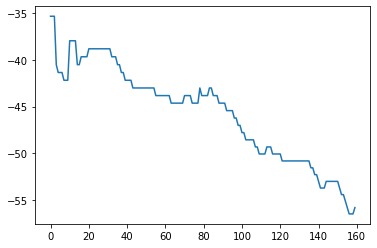

In [67]:
plt.plot(pl_ARCSAF_y)

In [99]:
# another attempt at a general contour for FAFMIP output 


# here for MIROC
# only issue is it drops south after Kerguelen. Probably unavoidable, but it's a real signal. 
init_ARCSAF_y = np.interp(lonfile[0,mylon], ARCSAF_x, ARCSAF_y) 
pl_ARCSAF_y = 0*init_ARCSAF_y
pl_ARCSAF_co = 0*init_ARCSAF_y
#speed = cont_speed_4.isel(z_t=idep).mean('z_t')
dif=2
difu = 7

for i in np.arange(len(mylon)):
    AS_co = np.argmin(np.abs(init_ARCSAF_y[i] - np.array(latfile[mylat,0])))
    pl_ARCSAF_co[i] = np.argmax(np.array(pl_cont_mke_z[AS_co-dif:AS_co+difu,i]))
    pl_ARCSAF_co[i] = pl_ARCSAF_co[i] + AS_co-dif
    pl_ARCSAF_y[i] =  latfile[int(mylat[0] +pl_ARCSAF_co[i]),0 ]
    
## Ok that basically works. 

In [104]:
## one more time, this time for CESM ... most likely to hit some buggy bugs!
# yeah no CESM_heat_v. That's OK!!! Need to make it at some point. 


### Trying to at least make one big figure! 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

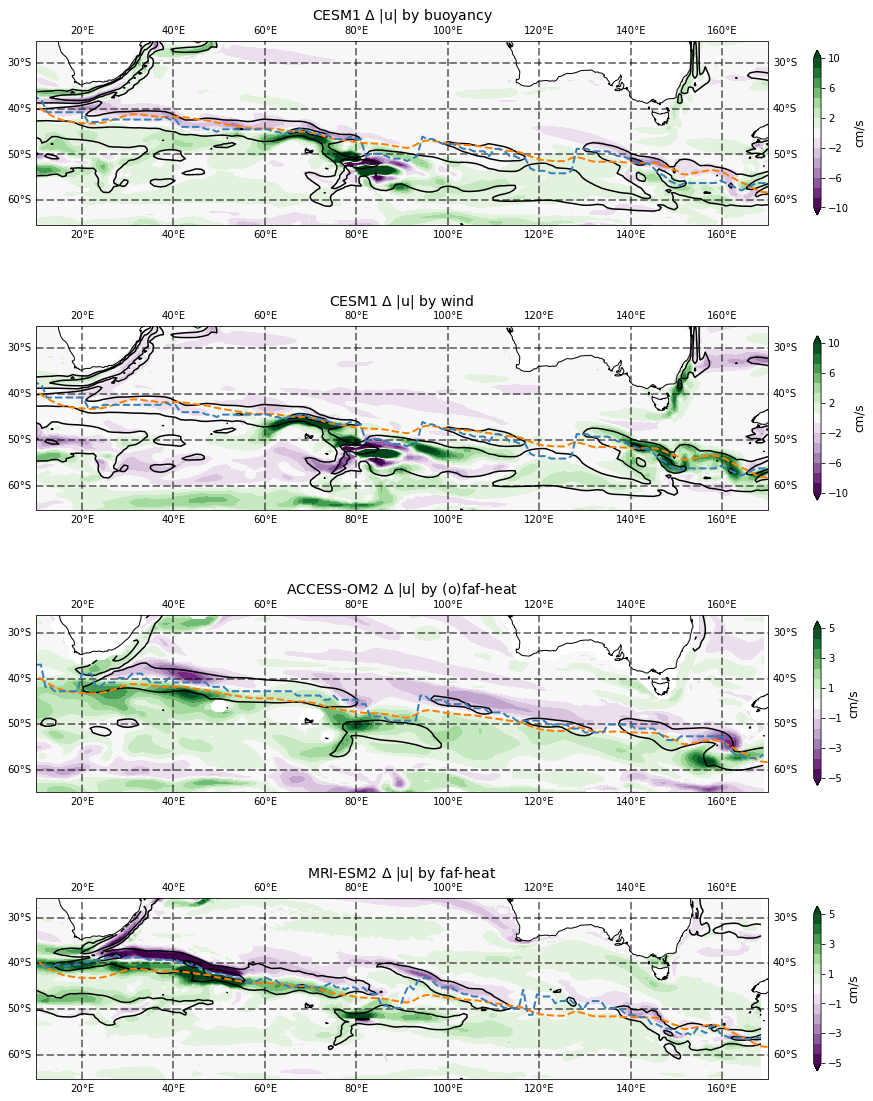

In [404]:
### Attempt to combine into one massive figure? # broken for now.
# first, I'll just try to combine the separate files together! 


fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(13,16), subplot_kw={'projection': ccrs.PlateCarree()}) 
fig.tight_layout()  
myclev = ([10,30])
slowticks = np.linspace(-5,5, 16, endpoint=True)
fastticks = np.linspace(-10,10, 16, endpoint=True)
slowtickprint = np.linspace(-5,5, 6, endpoint=True)
fasttickprint = np.linspace(-10,10, 6, endpoint=True)

    
CESM_c = axs[0].contour(CESMlon, CESMlat, CESMcsp, levels = myclev, colors='k')
axs[1].contour(CESMlon, CESMlat, CESMcsp, levels = myclev, colors='k')
CESM_d1 = axs[0].contourf(CESMlon, CESMlat, CESMdsp, levels=fastticks,  extend='both')      
CESM_d2 = axs[1].contourf(CESMlon, CESMlat, CESMdsp2, levels=fastticks,  extend='both')      
    
ACC_c =  axs[2].contour(ACClon, ACClat, ACCcsp, levels=myclev, colors='k')
ACC_d = axs[2].contourf(ACClon, ACClat, ACCdsp, levels=slowticks,  extend='both')    
    
    
MRI_c = axs[3].contour(MRIlon, MRIlat, MRIcsp, levels=myclev, colors='k')
MRI_d = axs[3].contourf(MRIlon, MRIlat, MRIdsp, levels=slowticks,  extend='both')
#gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
   

for i in np.arange(0,4):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
    gl.ylocator = mticker.FixedLocator([-60, -50, -40, -30])
    axs[i].set_xlim([10,170])
    axs[i].coastlines()
    axs[i].plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth = 2) # consider changing to yellow?

    
### plot the mARC-SAF.    
a3 = np.load('MRI_ARCSAF.npz')
pl_ARCSAF_y = a3['MRI_ARCSAF_y']
ARCSAF_xco = a3['lon_co']
axs[3].plot(MRIlon, pl_ARCSAF_y, '--', color = '#377eb8', linewidth = 2 )

a2 = np.load('ACCESS_ARCSAF.npz')
#pl_ARCSAF_y = a2['ACC_ARCSAF_y']
#ARCSAF_xco = a2['lon_co']
axs[2].plot(ACClon, a2['ACC_ARCSAF_y'], '--', color = '#377eb8', linewidth = 2 )

a0 = np.load('CESM1_ARCSAF.npz')
axs[0].plot(CESMlon, a0['CESM1_ARCSAF_y'], '--', color = '#377eb8', linewidth = 2) 
axs[1].plot(CESMlon, a0['CESM1_ARCSAF_y'], '--', color = '#377eb8', linewidth = 2) 


## titles
axs[0].set_title('CESM1 $\Delta$ |u| by buoyancy', size=14) 
axs[1].set_title('CESM1 $\Delta$ |u| by wind', size=14)
axs[2].set_title('ACCESS-OM2 $\Delta$ |u| by (o)faf-heat', size=14)
axs[3].set_title('MRI-ESM2 $\Delta$ |u| by faf-heat', size=14)

## colorbars. 
cbc0 = plt.colorbar(CESM_d1,ax= axs[0], ticks = fasttickprint, shrink = 0.6)
cbc1 = plt.colorbar(CESM_d2,ax= axs[1], ticks = fasttickprint, shrink = 0.6)
cbc2 = plt.colorbar(ACC_d,ax= axs[2], ticks = slowtickprint, shrink = 0.6)
cbc3 = plt.colorbar(MRI_d,ax= axs[3], ticks = slowtickprint, shrink = 0.6)


cbc0.set_label(label = 'cm/s', size=12)
cbc1.set_label(label = 'cm/s', size=12)
cbc2.set_label(label = 'cm/s', size=12)
cbc3.set_label(label = 'cm/s', size=12)
#plt.savefig('SISAZ_figures/combined_speedmap_5-6.eps')


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
#### foldern = 'Jan22means/'
## Here I want to add a layer of showing maximum MKE at least at the surface. 
#GFDL_heat_u = xr.open_dataarray('Jan22means/GFDL_heat_u.nc')
#GFDL_wind_u = xr.open_dataarray('Jan22means/GFDL_wind_u.nc')
## I could do a layer of u easily. Let's write that code perhaps below. But first! Let's get the v going, that's easy. 
##GFDL_cont_v_ds = xr.open_dataset('/nfs/data/FAFMIP/faf-passiveheat/vo_Omon_GFDL-ESM2M_faf-passiveheat_r1i1p1f1_gn_016101-017012.nc')
##GFDL_cont_v_surf = GFDL_cont_v_ds.isel(lev=0).mean('time')
##GFDL_heat_v_ds = xr.open_dataset('/nfs/data/FAFMIP/faf-heat/vo_Omon_GFDL-ESM2M_faf-heat_r1i1p1f1_gn_016101-017012.nc')
##GFDL_heat_v_surf = GFDL_cont_v_ds.isel(lev=0).mean('time')
#GFDL_cont_u=xr.open_dataarray(foldern + 'GFDL_cont_u.nc')
#GFDL_cont_v=xr.open_dataarray(foldern + 'GFDL_cont_v.nc')
#GFDL_heat_v=xr.open_dataarray(foldern + 'GFDL_heat_v.nc')
#
#GFDL_wind_v=xr.open_dataarray(foldern + 'GFDL_wind_v_good.nc')

In [5]:
#GFDL_cont_MKE = GFDL_cont_v.isel(lev=np.arange(0,15))**2 + GFDL_cont_u.isel(lev=np.arange(0,15))**2
#GFDL_heat_MKE = GFDL_heat_v.isel(lev=np.arange(0,15))**2 + GFDL_heat_u.isel(lev=np.arange(0,15))**2
#GFDL_wind_MKE = GFDL_wind_v.isel(lev=np.arange(0,15))**2 + GFDL_wind_u.isel(lev=np.arange(0,15))**2
##GFDL_heat_MKE = GFDL_heat_v_ds.vo**2 + pl_heat_u.isel(lev=0)**2

## oFAFMIP data analysis, trying to look at the maps of top velocity. 



In [185]:
# First processing the data. 
ACC_cont_v_file =  xr.open_dataset("/nfs/data/FAFMIP/OFAFMIP/ACCESS-OM2/vo_yr_ACCESS-OM2_FAF-control_01-70.nc")
ACC_heat_v_file =  xr.open_dataset("/nfs/data/FAFMIP/OFAFMIP/ACCESS-OM2/vo_yr_ACCESS-OM2_FAF-heat_01-70.nc")
ACC_cont_u_file =  xr.open_dataset("/nfs/data/FAFMIP/OFAFMIP/ACCESS-OM2/uo_yr_ACCESS-OM2_FAF-control_01-70.nc")
ACC_heat_u_file =  xr.open_dataset("/nfs/data/FAFMIP/OFAFMIP/ACCESS-OM2/uo_yr_ACCESS-OM2_FAF-heat_01-70.nc")

In [277]:
Had_cont_u[0,30,0]

<xarray.DataArray 'eastward_sea_water_velocity' ()>
array(0.1024608, dtype=float32)
Coordinates:
    depth               float32 5.0
    latitude            float64 -51.25
    longitude           float64 0.625
    model_level_number  int32 ...

In [240]:
# First processing the data. 
Had_cont_v_file =  xr.open_dataset("/nfs/data/FAFMIP/OFAFMIP/HadOM3/vo_yr_HadOM3_FAF-control_01-70.nc")
Had_heat_v_file =  xr.open_dataset("/nfs/data/FAFMIP/OFAFMIP/HadOM3/vo_yr_HadOM3_FAF-heat_01-70.nc")
Had_cont_u_file =  xr.open_dataset("/nfs/data/FAFMIP/OFAFMIP/HadOM3/uo_yr_HadOM3_FAF-control_01-70.nc")
Had_heat_u_file =  xr.open_dataset("/nfs/data/FAFMIP/OFAFMIP/HadOM3/uo_yr_HadOM3_FAF-heat_01-70.nc")

In [194]:
ACC_heat_v = ACC_heat_v_file.v.isel(time = np.arange(50,70)).mean('time')

In [195]:
ACC_heat_u = ACC_heat_u_file.u.isel(time = np.arange(50,70)).mean('time')

In [255]:
Had_cont_u = Had_cont_u_file.eastward_sea_water_velocity.isel(time = np.arange(50,70)).mean('time')

In [259]:
Had_heat_v = Had_heat_v_file.vo.isel(time = np.arange(50,70)).mean('time')

In [260]:
foldera = "Apr24means/"

Had_heat_v.to_netcdf(foldera+'Had_heat_v.nc')
#ACC_heat_v.to_netcdf(foldera+'ACC_heat_v.nc')
#MIROC_heat_sal.to_netcdf(foldern+'MIROC_wind_v.nc')

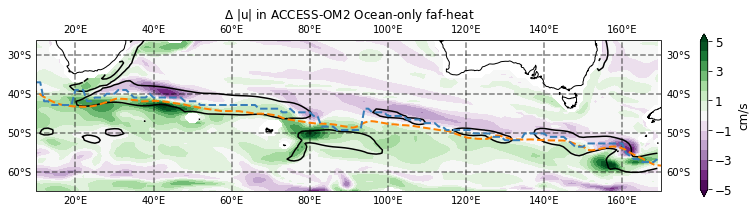

In [399]:
# Speed map for an arbitrary model! # Pretty heavily modified for ACCESS, since the lat and lon files are 1D.

# Seeing what I can do with surface MKE maps - first priority is to check CESM
 # experiment. 
import matplotlib.ticker as mticker
    
    
mnum = 5 # 0 = GFDL2 1 = MIROC, 2 = MRI, 3 = CanESM, 4 = CESM, 5 = "ACCESS", 6= "Had" (HadOM3)
mlist = [ "GFDL","MIROC","MRI","CanESM","CESM", "ACC", "Had"]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

lats = -65 # write these between -90 and 90
latn = -25  

lonw = 10 #write these between 0 and 360, sorry!
lone = 170

oglonw = int(lonw)
oglone = int(lone)

depth = 200

vm = 0.05
vmT = 3
vmc = 0.2
nlev = 15 # number of contours of the mean circulation

um = 4
#fig.suptitle(mlist[mnum]+' output zonal average, '+str(lonw)+' - '+str(lone)+' E')

foldern = 'Apr24means/'#'Jan22means/'
# seems like the best way to do this is to have a dictionary. Probably one dictionary for each model. This will require thinking!
# likely it's not that bad. For a start, you can write a simple code just to pull them from files! 
#Then make the dictionary when you rewrite the read from file codes to make them efficient
pl_heat_u = xr.open_dataarray(foldern + mlist[mnum]+'_heat_u.nc')
pl_heat_v = xr.open_dataarray(foldern + mlist[mnum]+'_heat_v.nc')
#pl_heat_theta = xr.open_dataarray(foldern + mlist[mnum]+'_heat_theta.nc')
#pl_heat_pass = xr.open_dataarray(foldern + mlist[mnum]+'_heat_pass.nc')
#pl_heat_sal = xr.open_dataarray(foldern + mlist[mnum]+'_heat_sal.nc')
pl_cont_u = xr.open_dataarray(foldern + mlist[mnum]+'_cont_u.nc')
pl_cont_v = xr.open_dataarray(foldern + mlist[mnum]+'_cont_v.nc')
#pl_cont_pass = xr.open_dataarray(foldern + mlist[mnum]+'_cont_pass.nc')
#pl_cont_sal = xr.open_dataarray(foldern + mlist[mnum]+'_cont_sal.nc')
#pl_cont_theta = xr.open_dataarray(foldern + mlist[mnum]+'_cont_theta.nc')

# to do it everywhere else we need to mean the meridional velocities. whew another day. 


if mnum==0:
    lonfile = pl_heat_theta.lon
    latfile = pl_heat_theta.lat
    depfile = pl_heat_theta.lev
    #pl_cont_sig0 = gsw.sigma0(pl_cont_sal, pl_cont_theta)
    
    
elif mnum in (1,2,3): 
    lonfile = pl_cont_u.longitude
    latfile = pl_cont_u.latitude
    depfile = pl_cont_u.lev
    #pl_cont_sig0 = gsw.sigma0(pl_cont_sal, pl_cont_theta)
    #if mnum==1: # better solution once I make a dictionary
        #pl_cont_sig0 = MIROC_cont_sig0
    #else:
        #pl_cont_sig0 = 0*MIROC_cont_sig0
    
elif mnum ==4:
    lonfile = pl_cont_u.lon
    latfile = pl_cont_u.lat
    depfile = pl_cont_u.lev
    
elif mnum==5:
    lonfile = pl_cont_u.xu_ocean
    latfile = pl_cont_u.yu_ocean
    depfile = pl_cont_u.depth

elif mnum==6:
    lonfile = pl_cont_u.longitude
    latfile = pl_cont_u.latitude
    depfile = pl_cont_u.depth
    
    #pl_cont_sig0 = 0*MIROC_cont_sig0


# pick actual latitudes
lonmax = [80, 360, 360, 360, 360, 80]
lonmin = [-280, 0, 0,0,0, -280]


if lone>lonmax[mnum]:
    lone = lone - 360
if lone<lonmin[mnum]:
    lone = lone + 360
    
if lonw>lonmax[mnum]:
    lonw = lonw - 360
if lonw<lonmin[mnum]:
    lonw = lonw + 360
    
lonecd = np.argmin(np.abs(np.array(lone - lonfile)))
lonwcd = np.argmin(np.abs(np.array(lonw - lonfile)))  
latncd = np.argmin(np.abs(np.array(latn - latfile)))
latscd = np.argmin(np.abs(np.array(lats - latfile)))

if lonwcd>lonecd:
    lonwcd = lonwcd-len(lonfile)

mylat = np.arange(latscd,latncd)
mylon = np.arange(lonwcd,lonecd)

idealdepth = [40, 48, 48, 30, 46, 20]
regdep = np.arange(0,idealdepth[mnum])


depf = [-1, -1, -1, -1, -0.01, -1]
yy, zz = np.meshgrid(latfile[mylat],  depf[mnum]* depfile[regdep])
#yy2, zz2 = np.meshgrid(latfile[np.arange(lats,latn-1),0],  depf[mnum]* depfile[regdep])

#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)

plt.set_cmap('PRGn')


#tau1_uplt_4 = tau1_um_4[matdepc,matlatc, matlonc].mean(dim='nlon')
#cont_uplt_4 = cont_um_4[matdepc,matlatc, matlonc].mean(dim='nlon')
pl_cont_mke = (pl_cont_u[regdep,mylat,mylon]**2 + pl_cont_v[regdep,mylat,mylon]**2)**0.5
pl_heat_mke = (pl_heat_u[regdep,mylat,mylon]**2 + pl_heat_v[regdep,mylat,mylon]**2)**0.5
#_mke = cont_um_4[matdepc,matlatc, matlonc]**2 + cont_vm_4[matdepc,matlatc, matlonc]**2

pl_cont_mke_z = np.mean(pl_cont_mke,0) 
pl_heat_mke_z = np.mean(pl_heat_mke,0) 
#'--', color = '#377eb8'

# use isel ... ideally.
#clev=[0.02,0.1]
myclev = [10,30]
Dticks = np.linspace(-5,5, 16, endpoint=True)

if mnum==5:
    C = ax.contour(np.arange(oglonw,oglone),latfile[mylat], pl_cont_mke_z*100, levels=myclev, colors='k')
    D = ax.contourf(np.arange(oglonw,oglone),latfile[mylat], (pl_heat_mke_z- pl_cont_mke_z)*100, levels=Dticks,  extend='both')
else: 
    C = ax.contour(lonfile[mylon],latfile[mylat], pl_cont_mke_z*100, levels=myclev, colors='k')
    D = ax.contourf(lonfile[mylon],latfile[mylat], (pl_heat_mke_z- pl_cont_mke_z*100), levels=Dticks,  extend='both')
gl = ax.gridlines(crs=ccrs.PlateCarree(),  linewidth=1.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
#E = ax.contour(u_autu.longitude,u_autu.latitude.isel(latitude=lati), mke_mean.isel(latitude=lati), levels=[20,100], colors='green')
ax.plot(ARCSAF_x, ARCSAF_y, '--', color='#ff7f00', linewidth=2)

ax.plot(np.arange(oglonw, oglone), ACC_ARCSAF_y, '--', color = '#377eb8', linewidth=2)
ax.set_xlim([oglonw, oglone])

#plt.set_cmap("bwr")
#plt.clim([-2,2])

ACClon = np.arange(oglonw,oglone)
ACClat = latfile[mylat]
ACCcsp = pl_cont_mke_z*100
ACCdsp = (pl_heat_mke_z- pl_cont_mke_z)*100


plt.title('$\Delta$ |u| in ACCESS-OM2 Ocean-only faf-heat')
#fig.colorbar(A, ax=axs[0,0])
#fig.colorbar(B, ax=axs[0,1])
cbc = plt.colorbar(D, ticks = Dticks,shrink = 0.6)
#fig.colorbar(D, ax=axs[1,1])
#fig.colorbar(ALL, ax=axs.ravel().tolist()) # actually no because they're all different models!!!
#
cbc.set_ticks(np.linspace(-5,5, 6, endpoint=True))
cbc.ax.tick_params(labelsize=12)

gl.ylocator = mticker.FixedLocator([-60, -50, -40, -30])
#ax.tick_params(labelsize= 20, direction='in')
#plt.grid()# width = 2, length = 7, right=1, top=1,labelleft=1, labelright=0, labelbottom=1)
cbc.set_label(label = 'cm/s', size=12)
#plt.savefig('SISAZ_figures/ACCESS_ofaf-heat_speedmap_v2.eps')



In [340]:
 
# ARC-SAF for ACCESS

# grab the argmax within a range around the ARC-SAF. 
# will only work for the range of matlonc



init_ARCSAF_y = np.interp(np.arange(oglonw, oglone), ARCSAF_x, ARCSAF_y) 
ACC_ARCSAF_y = 0*init_ARCSAF_y
ACC_ARCSAF_co = 0*init_ARCSAF_y

ACC_lon = np.arange(oglonw, oglone)

#speed = cont_speed_4.isel(z_t=idep).mean('z_t')
dif=1 # this is a bit sketchy! 
difu = 5

for i in np.arange(len(mylon)):
    AS_co = np.argmin(np.abs(init_ARCSAF_y[i] - np.array(latfile[mylat])))
    ACC_ARCSAF_co[i] = np.argmax(np.array(pl_cont_mke_z[AS_co-dif:AS_co+difu,i]))
    ACC_ARCSAF_co[i] = ACC_ARCSAF_co[i] + AS_co-dif
    ACC_ARCSAF_y[i] =  latfile[int(mylat[0] +ACC_ARCSAF_co[i])]
    
## Ok that basically works. 
    
    
    

In [341]:
#np.savez('ACCESS_ARCSAF.npz', ACC_ARCSAF_y = ACC_ARCSAF_y, ACC_ARCSAF_co = ACC_ARCSAF_co, lat_co= mylat, lon_co =mylon, ACC_x = ACC_lon)

<xarray.DataArray 'yu_ocean' (yu_ocean: 46)>
array([-64.742087, -64.149409, -63.541394, -62.918018, -62.279279, -61.625204,
       -60.955844, -60.271275, -59.571599, -58.856944, -58.12746 , -57.383325,
       -56.624739, -55.851929, -55.065141, -54.264649, -53.450747, -52.623753,
       -51.784004, -50.931862, -50.067707, -49.19194 , -48.304981, -47.407268,
       -46.499258, -45.581426, -44.65426 , -43.718267, -42.773967, -41.821894,
       -40.862596, -39.89663 , -38.924569, -37.946991, -36.964486, -35.977653,
       -34.987096, -33.993426, -32.997259, -31.999217, -30.999922, -30.      ,
       -29.000457, -28.004561, -27.015919, -26.038059])
Coordinates:
  * yu_ocean  (yu_ocean) float64 -64.74 -64.15 -63.54 ... -28.0 -27.02 -26.04
Attributes:
    axis:           Y
    units:          degrees_north
    standard_name:  latitude
    long_name:      ucell latitude

In [279]:
pl_cont_mke_z

<xarray.DataArray (yu_ocean: 101, xu_ocean: 160)>
array([[0.00581782, 0.00689286, 0.00840082, ..., 0.02561288, 0.02623045,
        0.02587428],
       [0.0071109 , 0.0078983 , 0.00927582, ..., 0.02546252, 0.02344518,
        0.02283659],
       [0.00803893, 0.0079928 , 0.00835459, ..., 0.02248777, 0.020433  ,
        0.01887661],
       ...,
       [       inf,        inf,        inf, ..., 0.16234589, 0.16616997,
        0.17045814],
       [       inf,        inf,        inf, ..., 0.1643927 , 0.16898215,
        0.17379184],
       [       inf,        inf,        inf, ..., 0.16420117, 0.17006621,
        0.17627713]], dtype=float32)
Coordinates:
  * yu_ocean  (yu_ocean) float64 -64.74 -64.15 -63.54 ... -1.0 -0.6667 -0.3333
  * xu_ocean  (xu_ocean) float64 10.0 11.0 12.0 13.0 ... -193.0 -192.0 -191.0

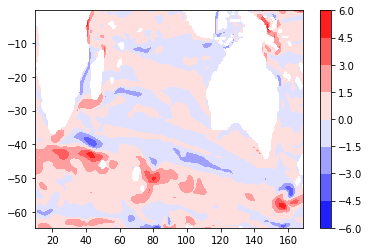

In [235]:
plt.contourf(np.arange(10,170),latfile[mylat],(pl_heat_mke_z- pl_cont_mke_z)*100) # OK that looks very nice. That's pretty much exactly what I want though ... 

plt.colorbar()

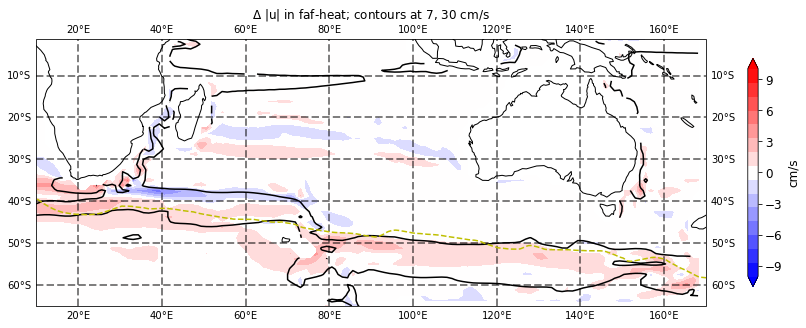

In [281]:
# Speed map for an arbitrary model! # Pretty heavily modified for ACCESS, since the lat and lon files are 1D.

# Seeing what I can do with surface MKE maps - first priority is to check CESM
 # experiment. 

mnum = 6 # 0 = GFDL2 1 = MIROC, 2 = MRI, 3 = CanESM, 4 = CESM, 5 = "ACCESS", 6= "Had" (HadOM3)
mlist = [ "GFDL","MIROC","MRI","CanESM","CESM", "ACC", "Had"]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,7)) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

lats = -65 # write these between -90 and 90
latn = 0  

lonw = 10 #write these between 0 and 360, sorry!
lone = 170

oglonw = int(lonw)
oglone = int(lone)

depth = 200

vm = 0.05
vmT = 3
vmc = 0.2
nlev = 15 # number of contours of the mean circulation

um = 4
#fig.suptitle(mlist[mnum]+' output zonal average, '+str(lonw)+' - '+str(lone)+' E')

foldern = 'Apr24means/'#'Jan22means/'
# seems like the best way to do this is to have a dictionary. Probably one dictionary for each model. This will require thinking!
# likely it's not that bad. For a start, you can write a simple code just to pull them from files! 
#Then make the dictionary when you rewrite the read from file codes to make them efficient
pl_heat_u = xr.open_dataarray(foldern + mlist[mnum]+'_heat_u.nc')
pl_heat_v = xr.open_dataarray(foldern + mlist[mnum]+'_heat_v.nc')
#pl_heat_theta = xr.open_dataarray(foldern + mlist[mnum]+'_heat_theta.nc')
#pl_heat_pass = xr.open_dataarray(foldern + mlist[mnum]+'_heat_pass.nc')
#pl_heat_sal = xr.open_dataarray(foldern + mlist[mnum]+'_heat_sal.nc')
pl_cont_u = xr.open_dataarray(foldern + mlist[mnum]+'_cont_u.nc')
pl_cont_v = xr.open_dataarray(foldern + mlist[mnum]+'_cont_v.nc')
#pl_cont_pass = xr.open_dataarray(foldern + mlist[mnum]+'_cont_pass.nc')
#pl_cont_sal = xr.open_dataarray(foldern + mlist[mnum]+'_cont_sal.nc')
#pl_cont_theta = xr.open_dataarray(foldern + mlist[mnum]+'_cont_theta.nc')

# to do it everywhere else we need to mean the meridional velocities. whew another day. 


if mnum==0:
    lonfile = pl_heat_theta.lon
    latfile = pl_heat_theta.lat
    depfile = pl_heat_theta.lev
    #pl_cont_sig0 = gsw.sigma0(pl_cont_sal, pl_cont_theta)
    
    
elif mnum in (1,2,3): 
    lonfile = pl_cont_u.longitude
    latfile = pl_cont_u.latitude
    depfile = pl_cont_u.lev
    #pl_cont_sig0 = gsw.sigma0(pl_cont_sal, pl_cont_theta)
    #if mnum==1: # better solution once I make a dictionary
        #pl_cont_sig0 = MIROC_cont_sig0
    #else:
        #pl_cont_sig0 = 0*MIROC_cont_sig0
    
elif mnum ==4:
    lonfile = pl_cont_u.lon
    latfile = pl_cont_u.lat
    depfile = pl_cont_u.lev
    
elif mnum==5:
    lonfile = pl_cont_u.xu_ocean
    latfile = pl_cont_u.yu_ocean
    depfile = pl_cont_u.depth

elif mnum==6:
    lonfile = pl_cont_u.longitude
    latfile = pl_cont_u.latitude
    depfile = pl_cont_u.depth
    
    #pl_cont_sig0 = 0*MIROC_cont_sig0


# pick actual latitudes
lonmax = [80, 360, 360, 360, 360, 80, 360]
lonmin = [-280, 0, 0,0,0, -280, 0 ]


if lone>lonmax[mnum]:
    lone = lone - 360
if lone<lonmin[mnum]:
    lone = lone + 360
    
if lonw>lonmax[mnum]:
    lonw = lonw - 360
if lonw<lonmin[mnum]:
    lonw = lonw + 360
    
lonecd = np.argmin(np.abs(np.array(lone - lonfile)))
lonwcd = np.argmin(np.abs(np.array(lonw - lonfile)))  
latncd = np.argmin(np.abs(np.array(latn - latfile)))
latscd = np.argmin(np.abs(np.array(lats - latfile)))

if lonwcd>lonecd:
    lonwcd = lonwcd-len(lonfile)

mylat = np.arange(latscd,latncd)
mylon = np.arange(lonwcd,lonecd)

idealdepth = [40, 48, 48, 30, 46, 20, 13]
regdep = np.arange(0,idealdepth[mnum])


depf = [-1, -1, -1, -1, -0.01, -1 , -1]
yy, zz = np.meshgrid(latfile[mylat],  depf[mnum]* depfile[regdep])
#yy2, zz2 = np.meshgrid(latfile[np.arange(lats,latn-1),0],  depf[mnum]* depfile[regdep])

#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)

plt.set_cmap('bwr')


#tau1_uplt_4 = tau1_um_4[matdepc,matlatc, matlonc].mean(dim='nlon')
#cont_uplt_4 = cont_um_4[matdepc,matlatc, matlonc].mean(dim='nlon')
pl_cont_mke = (pl_cont_u[regdep,mylat,mylon]**2 + pl_cont_v[regdep,mylat,mylon]**2)**0.5
pl_heat_mke = (pl_heat_u[regdep,mylat,mylon]**2 + pl_heat_v[regdep,mylat,mylon]**2)**0.5
#_mke = cont_um_4[matdepc,matlatc, matlonc]**2 + cont_vm_4[matdepc,matlatc, matlonc]**2

pl_cont_mke_z = np.mean(pl_cont_mke,0) 
pl_heat_mke_z = np.mean(pl_heat_mke,0) 


# use isel ... ideally.
#clev=[0.02,0.1]
myclev = [10,30]
Dticks = np.linspace(-10,10, 16, endpoint=True)

if mnum==5:
    C = ax.contour(np.arange(oglonw,oglone),latfile[mylat], pl_cont_mke_z*100, levels=myclev, colors='k')
    D = ax.contourf(np.arange(oglonw,oglone),latfile[mylat], (pl_heat_mke_z- pl_cont_mke_z)*100, levels=Dticks,  extend='both')
else: 
    C = ax.contour(lonfile[mylon],latfile[mylat], pl_cont_mke_z*100, levels=myclev, colors='k')
    D = ax.contourf(lonfile[mylon],latfile[mylat], (pl_heat_mke_z- pl_cont_mke_z*100), levels=Dticks,  extend='both')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
#E = ax.contour(u_autu.longitude,u_autu.latitude.isel(latitude=lati), mke_mean.isel(latitude=lati), levels=[20,100], colors='green')
ax.plot(ARCSAF_x, ARCSAF_y, 'y--')

#ax.plot(lonfile[mylon], pl_ARCSAF_y, 'g--')
ax.set_xlim([oglonw, oglone])

plt.set_cmap("bwr")
#plt.clim([-2,2])


plt.title('$\Delta$ |u| in faf-heat; contours at 7, 30 cm/s')
#fig.colorbar(A, ax=axs[0,0])
#fig.colorbar(B, ax=axs[0,1])
cbc = plt.colorbar(D, ticks = Dticks,shrink = 0.6)
#fig.colorbar(D, ax=axs[1,1])
#fig.colorbar(ALL, ax=axs.ravel().tolist()) # actually no because they're all different models!!!
#
cbc.set_ticks(np.linspace(-15,15, 11, endpoint=True))
cbc.ax.tick_params(labelsize=12)


#ax.tick_params(labelsize= 20, direction='in')
#plt.grid()# width = 2, length = 7, right=1, top=1,labelleft=1, labelright=0, labelbottom=1)
cbc.set_label(label = 'cm/s', size=12)
#plt.savefig('SISAZ_figures/CESM_tau1-cont_mke_circumpolar_1110_aviso.eps')



## Maps combining velocity and warming: is it possible? 

In [5]:
# basically, there would be 3 datasets that I would try to combine: 
# MKE, which is not hard. 
# change in velocity vectors. (quiver). Ideally, I would use purple for slowing and the green for speeding up??
# this could also be confusing though! 
# warming in shading. 
# this is a complex map. 
# start with CESM1? I know I have dOHC saved somewhere for this run. 

# yeah this works I think! 
tau1_tm_4

<xarray.DataArray 'TEMP' (z_t: 60, nlat: 384, nlon: 320)>
[7372800 values with dtype=float32]
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon

In [29]:
# quickly getting OHC (in the top 2000m? probably just as a whole ... ) 
#tau1_tdif_4 = tau1_tm_4[matdepc,matlatc, matlonc] - cont_tm_4[matdepc,matlatc, matlonc]

zt = np.array(tau1_tm_4.z_t)
zw = np.diff((zt[0:-1]+zt[1:])/2)
zwfull = np.append(zw[0],zw)
zwfull =  np.append(zwfull, zw[-1])
zwfull
dz_t = xr.DataArray(data = zwfull, dims=['z_t'], coords= dict(z_t=(tau1_tm_4.z_t)))


In [30]:
sum(dz_t[0:20])

<xarray.DataArray ()>
array(20368.58203125)

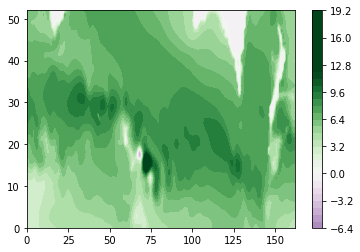

In [103]:
test = dz_t*tau1_tdif_4
a= test.sum('z_t')*1035*3850/1e11
plt.contourf(a , vmin=-12, vmax=12, levels=30)
plt.colorbar()

<ipython-input-39-c83abe752b94>:173: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


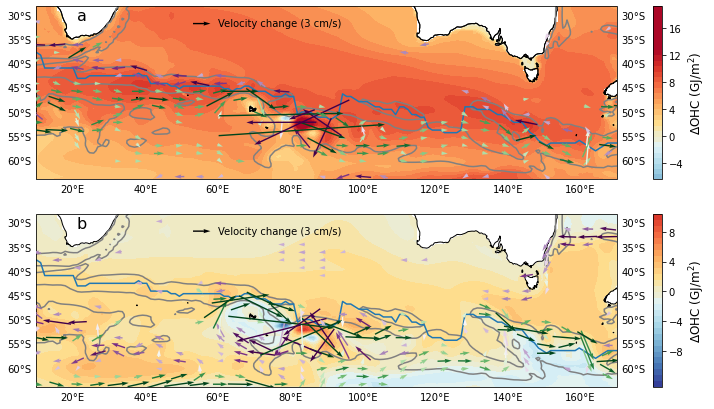

In [39]:
# CESM MKE change plots - pretty nice! 

import matplotlib.colors as colors

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(13,7), subplot_kw={'projection': ccrs.PlateCarree()})
#ax = plt.axes(projection=ccrs.PlateCarree())
axs[0].coastlines()
# need a projection that's not platecarree and allows a better resolution? 

lats = -63 # write these between -90 and 90
latn = -28  

lonw = -20 #write these between 0 and 360, sorry!
lone = 180 # not sure what these do now?

depth = 3000

vm = 0.05
vmT = 3
vmc = 0.2
nlev = 15 # number of contours of the mean circulation

um = 4
#fig.suptitle(mlist[mnum]+' output zonal average, '+str(lonw)+' - '+str(lone)+' E')



# pick actual latitudes
lonmax = [80, 360, 360, 360, 360]
lonmin = [-280, 0, 0,0,0]



# coords for Matt's Taulock code
matlats = tau4_um_4.TLAT[:,0]
matlatc = np.arange(np.argmin(np.abs(np.array(matlats-lats)))-1, np.argmin(np.abs(np.array(matlats-latn)))+1)
matlons = tau4_um_4.TLONG[0,:]
matlonc = np.arange(37,200)#,np.arange(0,35)])
#matlonc = np.arange(np.argmin(np.abs(np.array(matlons-lonw))), np.argmin(np.abs(np.array(matlons-lone))))
matdepc = np.arange(0, 1+np.argmin(np.abs(np.array(tau4_um_4.z_t/100-depth))))



#depf = [-1, -1, -1, -1, -0.01]
#yy, zz = np.meshgrid(latfile[mylat,0],  depf[mnum]* depfile[regdep])
#yy2, zz2 = np.meshgrid(latfile[np.arange(lats,latn-1),0],  depf[mnum]* depfile[regdep])

#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)
idep = np.arange(0,15)
plt.set_cmap('PRGn')


tau1_speed_4 = (tau1_um_4[matdepc,matlatc, matlonc]**2 + tau1_vm_4[matdepc,matlatc, matlonc]**2)**0.5
tau4_speed_4 = (tau4_um_4[matdepc,matlatc, matlonc]**2 + tau4_vm_4[matdepc,matlatc, matlonc]**2)**0.5
cont_speed_4 = (cont_um_4[matdepc,matlatc, matlonc]**2 + cont_vm_4[matdepc,matlatc, matlonc]**2)**0.5
tau1_udif_4 = tau1_um_4[matdepc,matlatc, matlonc] - cont_um_4[matdepc,matlatc, matlonc]
tau1_vdif_4 = tau1_vm_4[matdepc,matlatc, matlonc] - cont_vm_4[matdepc,matlatc, matlonc]
tau1_acc_4 = tau1_speed_4.isel(z_t=idep).mean('z_t') - cont_speed_4.isel(z_t=idep).mean('z_t')

tau4_udif_4 = tau4_um_4[matdepc,matlatc, matlonc] - cont_um_4[matdepc,matlatc, matlonc]
tau4_vdif_4 = tau4_vm_4[matdepc,matlatc, matlonc] - cont_vm_4[matdepc,matlatc, matlonc]
tau4_acc_4 = tau4_speed_4.isel(z_t=idep).mean('z_t') - cont_speed_4.isel(z_t=idep).mean('z_t')

tau1_tdif_4 = tau1_tm_4[matdepc,matlatc, matlonc] - cont_tm_4[matdepc,matlatc, matlonc]
tmp = dz_t*tau1_tdif_4
tau1_ohc= tmp.sum('z_t')*1035*3850/1e11 # this is now in GJ/m^2, the typical unit. 

tau4_tdif_4 = tau4_tm_4[matdepc,matlatc, matlonc] - cont_tm_4[matdepc,matlatc, matlonc]
tm4 = dz_t*tau4_tdif_4
tau4_ohc= tm4.sum('z_t')*1035*3850/1e11 # this is now in GJ/m^2, the typical unit. 

tau1_ohc = tau1_ohc.where(tau1_ohc!=0)
tau4_ohc = tau4_ohc.where(tau4_ohc!=0)

#tau1_mke_4 = 0.5*1035*0.0001*tau1_mke_4
#tau4_mke_4 = 0.5*1035*0.0001*tau4_mke_4
#cont_mke_4 = 0.5*1035*0.0001*cont_mke_4

# use isel ... ideally.
blk = 5
blk2= 3 # note that CESM has pretty thin grid cells in the meridional direction

a = tau1_udif_4.isel(z_t=idep).mean('z_t')
b = a.coarsen(nlon = blk, boundary = 'trim').mean()
c = b.coarsen(nlat = blk2, boundary = 'trim').mean()

a = tau1_vdif_4.isel(z_t=idep).mean('z_t')
d = a.coarsen(nlon = blk, boundary = 'trim').mean()
e = d.coarsen(nlat = blk2, boundary = 'trim').mean()

f = tau1_acc_4.coarsen(nlon = blk, boundary = 'trim').mean()
g = f.coarsen(nlat = blk2, boundary = 'trim').mean()


aw = tau4_udif_4.isel(z_t=idep).mean('z_t')
bw = aw.coarsen(nlon = blk, boundary = 'trim').mean()
cw = bw.coarsen(nlat = blk2, boundary = 'trim').mean()

mw = tau4_vdif_4.isel(z_t=idep).mean('z_t')
dw = mw.coarsen(nlon = blk, boundary = 'trim').mean()
ew = dw.coarsen(nlat = blk2, boundary = 'trim').mean()

fw = tau4_acc_4.coarsen(nlon = blk, boundary = 'trim').mean()
gw = fw.coarsen(nlat = blk2, boundary = 'trim').mean()



e = xr.where(e**2+c**2>1, e, np.nan)
c = xr.where(e**2+c**2>1, c, np.nan)
ew = xr.where(ew**2+cw**2>1, ew, np.nan)
cw = xr.where(ew**2+cw**2>1, cw, np.nan)


clev=[2,10] #
myclev = [10,100]
idep = np.arange(0,15) # oh interesting, just the top 15 levels? what are these? top 150 m it turns out. 
Dticks = np.linspace(-10,10, 16, endpoint=True)

tick_print = np.linspace(-10,10, 6, endpoint=True)
OHC_tick_print = np.linspace(-4, 20, 7, endpoint=True)
OHC_tick_print2 = np.linspace(-8, 12, 6, endpoint=True)

OHCv = 13

for j in range(2):
    axs[j].plot(tau4_um_4.TLONG[0,ARCSAF_xco], SAFy)
    

C = axs[0].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='gray')
#C2 = axs[1].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
#D = axs[0].quiver(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau1_udif_4.isel(z_t=idep).mean('z_t'), tau1_vdif_4.isel(z_t=idep).mean('z_t'))
plt.set_cmap(cmaps.cmp_b2r)#'coolwarm')#YlOrBr')#("Oranges")
Td = axs[0].contourf(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau1_ohc, norm = colors.Normalize(vmin=-OHCv, vmax=OHCv),levels=30)
plt.set_cmap('PRGn')
D = axs[0].quiver( c.TLONG[0,:], c.TLAT[:,0], c, e, c , scale=100, norm = colors.Normalize(vmin=-3, vmax=3), pivot='mid' , zorder =4 )
#axs[0].quiverkey(D,   X=0.3, Y=0.9, U=2, label='Speed change (2 cm/s)', labelpos='E')
#D2 = axs[1].contourf(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau4_speed_4.isel(z_t=idep).mean('z_t') - cont_speed_4.isel(z_t=idep).mean('z_t'), levels=Dticks, extend='both', )

#C2 = axs[1].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
C2 = axs[1].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='gray')
#D = axs[0].quiver(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau1_udif_4.isel(z_t=idep).mean('z_t'), tau1_vdif_4.isel(z_t=idep).mean('z_t'))
plt.set_cmap(cmaps.cmp_b2r)#'coolwarm')#YlOrBr')#("Oranges")
Td2 = axs[1].contourf(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau4_ohc, norm = colors.Normalize(vmin=-OHCv, vmax=OHCv),levels=30)
plt.set_cmap('PRGn')
D2 = axs[1].quiver( cw.TLONG[0,:], cw.TLAT[:,0], cw, ew, cw ,scale = 100,norm = colors.Normalize(vmin=-3, vmax=3), pivot='mid' , zorder =4)
axs[0].quiverkey(D,   X=0.3, Y=0.9, U=3, label='Velocity change (3 cm/s)', labelpos='E')
axs[1].quiverkey(D2,   X=0.3, Y=0.9, U=3, label='Velocity change (3 cm/s)', labelpos='E')




#axs[0].plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth=2)
#axs[0].plot(matlons[matlonc], CESM1_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)
#axs[1].plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth=2)
#axs[1].plot(matlons[matlonc], CESM1_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)

#ax.plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth = 2)
#ax.plot(lonfile[0,mylon], pl_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)
plabels =['a','b']
for i in np.arange(0,2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0, linestyle='--', draw_labels=True)
    axs[i].set_xlim([10,170])
    gl.top_labels = False
    axs[i].set_aspect('auto')
    axs[i].coastlines()
    axs[i].text(0.07, 0.92, plabels[i], size = 16, transform = axs[i].transAxes)
   
cbc = plt.colorbar(Td,ax= axs[0], ticks = OHC_tick_print)
cbc2 = plt.colorbar(Td2,ax= axs[1], ticks = OHC_tick_print2)


fig.tight_layout()

#axs[0].set_title('$\Delta$ |u| by buoyancy fluxes (CO2x4-Tau1)') 
#axs[1].set_title('$\Delta$ |u| by wind stress (CO2x1-Tau4)')
#fig.colorbar(A, ax=axs[0,0])
#fig.colorbar(B, ax=axs[0,1])

#fig.colorbar(D, ax=axs[1,1])
#fig.colorbar(ALL, ax=axs.ravel().tolist()) # actually no because they're all different models!!!
#


#CESMlon = tau4_um_4.TLONG[0,matlonc]
#CESMlat = tau4_um_4.TLAT[matlatc,0]
#CESMcsp = cont_speed_4.isel(z_t=idep).mean('z_t')
#CESMdsp = tau1_speed_4.isel(z_t=idep).mean('z_t') - CESMcsp
#CESMdsp2 = tau4_speed_4.isel(z_t=idep).mean('z_t') - CESMcsp


#ax.tick_params(labelsize= 20, direction='in')
#plt.grid()# width = 2, length = 7, right=1, top=1,labelleft=1, labelright=0, labelbottom=1)
cbc.set_label(label = '$\Delta$OHC (GJ/m$^2$)', size=12)
cbc2.set_label(label = '$\Delta$OHC (GJ/m$^2$)', size=12)
#plt.savefig('SISAZ_figures/Taulock_fullmap_7-30.eps')


In [16]:
ca = np.load('CESM1_ARCSAF.npz')
mat_ARCSAF_y = ca['CESM1_ARCSAF_y']
ARCSAF_xco = ca['lon_co']
SAFy = mat_ARCSAF_y[matlonc - ARCSAF_xco[0]]
#ca.files
plt.plot(tau4_um_4.TLONG[0,ARCSAF_xco], SAFy)

NameError: name 'matlonc' is not defined

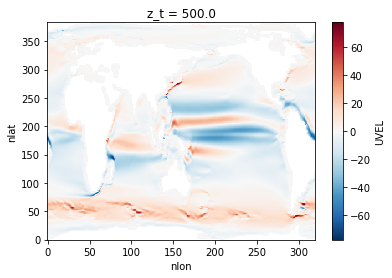

In [182]:
tst.UVEL.isel(z_t = 0).plot()

In [231]:
tau1_um_3 = xr.open_dataset('TauLockMeans/tau1_um_3.nc')
tau4_um_3 = xr.open_dataset('TauLockMeans/tau4_um_3.nc')
tau1_tm_3 = xr.open_dataset('TauLockMeans/tau1_tm_3.nc')
tau4_tm_3 = xr.open_dataset('TauLockMeans/tau4_tm_3.nc')


tau1_um_34 = (tau1_um_3.UVEL + tau1_um_4)*0.5
tau4_um_34 = (tau4_um_3.UVEL + tau4_um_4)*0.5
tau1_tm_34 = (tau1_tm_3.TEMP + tau1_tm_4)*0.5
tau4_tm_34 = (tau4_tm_3.TEMP + tau4_tm_4)*0.5


In [233]:
cont_um_3 = xr.open_dataset('TauLockMeans/contL_um_3.nc')
cont_um_4 = xr.open_dataset('TauLockMeans/contL_um_4.nc')
cont_tm_3 = xr.open_dataset('TauLockMeans/contL_tm_3.nc')
cont_tm_4 = xr.open_dataset('TauLockMeans/contL_tm_4.nc')


cont_um_34 = (cont_um_3.UVEL + cont_um_4.UVEL)*0.5
cont_tm_34 = (cont_tm_3.TEMP + cont_tm_4.TEMP)*0.5



In [225]:
#cont_vm_3 = xr.open_dataset('TauLockMeans/cont_vm_3.nc')
cont_vm_4 = xr.open_dataset('TauLockMeans/cont_vm_4.nc')
tau1_vm_3 = xr.open_dataset('TauLockMeans/tau1_vm_3.nc')
tau4_vm_3 = xr.open_dataset('TauLockMeans/tau4_vm_3.nc')

tau1_vm_34 = (tau1_vm_3.VVEL + tau1_vm_4)*0.5
tau4_vm_34 = (tau4_vm_3.VVEL + tau4_vm_4)*0.5
cont_vm_34 = cont_vm_4.VVEL # best for now

In [232]:
tau1_tm_34[matdepc,1,2]

<xarray.DataArray 'TEMP' (z_t: 50)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=float32)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 2.649e+05 2.889e+05
    ULONG    float64 323.4
    ULAT     float64 -78.42
    TLONG    float64 322.8
    TLAT     float64 -78.69

NameError: name 'cont_um_34' is not defined

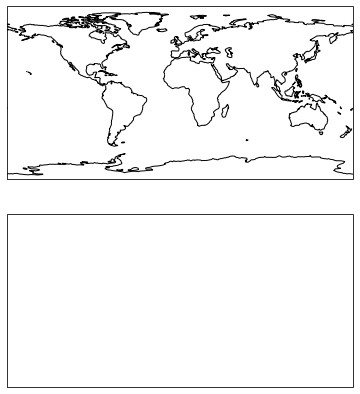

In [28]:
#### Don't use

## Redoing to include years 30-49. 

import matplotlib.colors as colors

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(13,7), subplot_kw={'projection': ccrs.PlateCarree()})
#ax = plt.axes(projection=ccrs.PlateCarree())
axs[0].coastlines()
# need a projection that's not platecarree and allows a better resolution? 

lats = -63 # write these between -90 and 90
latn = -28  

lonw = -20 #write these between 0 and 360, sorry!
lone = 180 # not sure what these do now?

depth = 3000

vm = 0.05
vmT = 3
vmc = 0.2
nlev = 15 # number of contours of the mean circulation

um = 4
#fig.suptitle(mlist[mnum]+' output zonal average, '+str(lonw)+' - '+str(lone)+' E')



# pick actual latitudes
lonmax = [80, 360, 360, 360, 360]
lonmin = [-280, 0, 0,0,0]



# coords for Matt's Taulock code
matlats = tau4_um_4.TLAT[:,0]
matlatc = np.arange(np.argmin(np.abs(np.array(matlats-lats)))-1, np.argmin(np.abs(np.array(matlats-latn)))+1)
matlons = tau4_um_4.TLONG[0,:]
matlonc = np.arange(37,200)#,np.arange(0,35)])
#matlonc = np.arange(np.argmin(np.abs(np.array(matlons-lonw))), np.argmin(np.abs(np.array(matlons-lone))))
matdepc = np.arange(0, 1+np.argmin(np.abs(np.array(tau4_um_4.z_t/100-depth))))



#depf = [-1, -1, -1, -1, -0.01]
#yy, zz = np.meshgrid(latfile[mylat,0],  depf[mnum]* depfile[regdep])
#yy2, zz2 = np.meshgrid(latfile[np.arange(lats,latn-1),0],  depf[mnum]* depfile[regdep])

#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)
idep = np.arange(0,15)
plt.set_cmap('PRGn')






#tau1_speed_34 = (tau1_um_34[matdepc,matlatc, matlonc]**2 + tau1_vm_34[matdepc,matlatc, matlonc]**2)**0.5
#tau4_speed_34 = (tau4_um_34[matdepc,matlatc, matlonc]**2 + tau4_vm_34[matdepc,matlatc, matlonc]**2)**0.5
cont_speed_34 = (cont_um_34[matdepc,matlatc, matlonc]**2 + cont_vm_34[matdepc,matlatc, matlonc]**2)**0.5
tau1_udif_34 = tau1_um_34[matdepc,matlatc, matlonc] - cont_um_34[matdepc,matlatc, matlonc]
tau1_vdif_34 = tau1_vm_34[matdepc,matlatc, matlonc] - cont_vm_34[matdepc,matlatc, matlonc]
#tau1_acc_4 = tau1_speed_4.isel(z_t=idep).mean('z_t') - cont_speed_4.isel(z_t=idep).mean('z_t')

tau4_udif_34 = tau4_um_34[matdepc,matlatc, matlonc] - cont_um_34[matdepc,matlatc, matlonc]
tau4_vdif_34 = tau4_vm_34[matdepc,matlatc, matlonc] - cont_vm_34[matdepc,matlatc, matlonc]
#tau4_acc_4 = tau4_speed_4.isel(z_t=idep).mean('z_t') - cont_speed_4.isel(z_t=idep).mean('z_t')

tau1_tdif_34 = tau1_tm_34[matdepc,matlatc, matlonc] - cont_tm_34[matdepc,matlatc, matlonc]
tmp = dz_t*tau1_tdif_34
tau1_ohc= tmp.sum('z_t')*1035*3850/1e11 # this is now in GJ/m^2, the typical unit. 

tau4_tdif_34 = tau4_tm_34[matdepc,matlatc, matlonc] - cont_tm_34[matdepc,matlatc, matlonc]
tm4 = dz_t*tau4_tdif_34
tau4_ohc= tm4.sum('z_t')*1035*3850/1e11 # this is now in GJ/m^2, the typical unit. 

tau1_ohc = tau1_ohc.where(tau1_ohc!=0)
tau4_ohc = tau4_ohc.where(tau4_ohc!=0)

#tau1_mke_4 = 0.5*1035*0.0001*tau1_mke_4
#tau4_mke_4 = 0.5*1035*0.0001*tau4_mke_4
#cont_mke_4 = 0.5*1035*0.0001*cont_mke_4

# use isel ... ideally.
blk = 5
blk2= 3 # note that CESM has pretty thin grid cells in the meridional direction

a = tau1_udif_34.isel(z_t=idep).mean('z_t')
b = a.coarsen(nlon = blk, boundary = 'trim').mean()
c = b.coarsen(nlat = blk2, boundary = 'trim').mean()

a = tau1_vdif_34.isel(z_t=idep).mean('z_t')
d = a.coarsen(nlon = blk, boundary = 'trim').mean()
e = d.coarsen(nlat = blk2, boundary = 'trim').mean()

#f = tau1_acc_4.coarsen(nlon = blk, boundary = 'trim').mean()
#g = f.coarsen(nlat = blk2, boundary = 'trim').mean()


aw = tau4_udif_34.isel(z_t=idep).mean('z_t')
bw = aw.coarsen(nlon = blk, boundary = 'trim').mean()
cw = bw.coarsen(nlat = blk2, boundary = 'trim').mean()

mw = tau4_vdif_34.isel(z_t=idep).mean('z_t')
dw = mw.coarsen(nlon = blk, boundary = 'trim').mean()
ew = dw.coarsen(nlat = blk2, boundary = 'trim').mean()

#fw = tau4_acc_4.coarsen(nlon = blk, boundary = 'trim').mean()
#gw = fw.coarsen(nlat = blk2, boundary = 'trim').mean()



e = xr.where(e**2+c**2>1, e, np.nan)
c = xr.where(e**2+c**2>1, c, np.nan)
ew = xr.where(ew**2+cw**2>1, ew, np.nan)
cw = xr.where(ew**2+cw**2>1, cw, np.nan)


clev=[2,10] #
myclev = [10,100]
idep = np.arange(0,15) # oh interesting, just the top 15 levels? what are these? top 150 m it turns out. 
Dticks = np.linspace(-10,10, 16, endpoint=True)

tick_print = np.linspace(-10,10, 6, endpoint=True)
OHC_tick_print = np.linspace(-4, 20, 7, endpoint=True)
OHC_tick_print2 = np.linspace(-8, 12, 6, endpoint=True)

OHCv = 12

for j in range(2):
    axs[j].plot(tau4_um_4.TLONG[0,ARCSAF_xco], SAFy)
    

C = axs[0].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_34.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
#C2 = axs[1].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
#D = axs[0].quiver(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau1_udif_4.isel(z_t=idep).mean('z_t'), tau1_vdif_4.isel(z_t=idep).mean('z_t'))
plt.set_cmap(cmaps.cmp_b2r)#'coolwarm')#YlOrBr')#("Oranges")
Td = axs[0].contourf(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau1_ohc, norm = colors.Normalize(vmin=-OHCv, vmax=OHCv),levels=30)
plt.set_cmap('PRGn')
D = axs[0].quiver( c.TLONG[0,:], c.TLAT[:,0], c, e, c , scale=100, norm = colors.Normalize(vmin=-3, vmax=3), pivot='mid' , zorder =4 )
#axs[0].quiverkey(D,   X=0.3, Y=0.9, U=2, label='Speed change (2 cm/s)', labelpos='E')
#D2 = axs[1].contourf(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau4_speed_4.isel(z_t=idep).mean('z_t') - cont_speed_4.isel(z_t=idep).mean('z_t'), levels=Dticks, extend='both', )

#C2 = axs[1].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
C2 = axs[1].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_34.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
#D = axs[0].quiver(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau1_udif_4.isel(z_t=idep).mean('z_t'), tau1_vdif_4.isel(z_t=idep).mean('z_t'))
plt.set_cmap(cmaps.cmp_b2r)#'coolwarm')#YlOrBr')#("Oranges")
Td2 = axs[1].contourf(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau4_ohc, norm = colors.Normalize(vmin=-OHCv, vmax=OHCv),levels=30)
plt.set_cmap('PRGn')
D2 = axs[1].quiver( cw.TLONG[0,:], cw.TLAT[:,0], cw, ew, cw ,scale = 100,norm = colors.Normalize(vmin=-3, vmax=3), pivot='mid' , zorder =4)
axs[0].quiverkey(D,   X=0.3, Y=0.9, U=3, label='Velocity change (3 cm/s)', labelpos='E')
axs[1].quiverkey(D2,   X=0.3, Y=0.9, U=3, label='Velocity change (3 cm/s)', labelpos='E')




#axs[0].plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth=2)
#axs[0].plot(matlons[matlonc], CESM1_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)
#axs[1].plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth=2)
#axs[1].plot(matlons[matlonc], CESM1_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)

#ax.plot(ARCSAF_x, ARCSAF_y, '--', color = '#ff7f00', linewidth = 2)
#ax.plot(lonfile[0,mylon], pl_ARCSAF_y, '--', color = '#377eb8', linewidth = 2)
plabels =['a','b']
for i in np.arange(0,2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0, linestyle='--', draw_labels=True)
    axs[i].set_xlim([10,170])
    gl.top_labels = False
    axs[i].set_aspect('auto')
    axs[i].coastlines()
    axs[i].text(0.07, 0.92, plabels[i], size = 16, transform = axs[i].transAxes)
   
cbc = plt.colorbar(Td,ax= axs[0], ticks = OHC_tick_print)
cbc2 = plt.colorbar(Td2,ax= axs[1], ticks = OHC_tick_print2)


fig.tight_layout()

#axs[0].set_title('$\Delta$ |u| by buoyancy fluxes (CO2x4-Tau1)') 
#axs[1].set_title('$\Delta$ |u| by wind stress (CO2x1-Tau4)')
#fig.colorbar(A, ax=axs[0,0])
#fig.colorbar(B, ax=axs[0,1])

#fig.colorbar(D, ax=axs[1,1])
#fig.colorbar(ALL, ax=axs.ravel().tolist()) # actually no because they're all different models!!!
#


#CESMlon = tau4_um_4.TLONG[0,matlonc]
#CESMlat = tau4_um_4.TLAT[matlatc,0]
#CESMcsp = cont_speed_4.isel(z_t=idep).mean('z_t')
#CESMdsp = tau1_speed_4.isel(z_t=idep).mean('z_t') - CESMcsp
#CESMdsp2 = tau4_speed_4.isel(z_t=idep).mean('z_t') - CESMcsp


#ax.tick_params(labelsize= 20, direction='in')
#plt.grid()# width = 2, length = 7, right=1, top=1,labelleft=1, labelright=0, labelbottom=1)
cbc.set_label(label = '$\Delta$OHC (GJ/m$^2$)', size=12)
cbc2.set_label(label = '$\Delta$OHC (GJ/m$^2$)', size=12)
#plt.savefig('SISAZ_figures/Taulock_fullmap_7-23.eps')


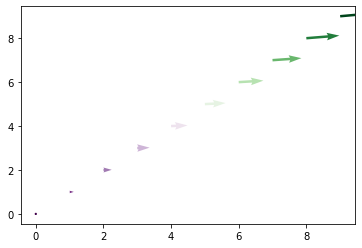

In [33]:
X = np.arange(0,10)
Y = np.arange(0,10)
plt.quiver(X,Y, np.sqrt(X*Y), X*Y/100 , X/3)

In [26]:
a = tau1_udif_4.isel(z_t=idep).mean('z_t')
b = a.coarsen(nlon = 3, boundary = 'trim').mean()
c = b.coarsen(nlat = 3, boundary = 'trim').mean()
c.TLAT[:,0]
c.TLONG[0,:]

<xarray.DataArray 'TLAT' (nlat: 17)>
array([-59.98857035, -58.385887  , -56.7831998 , -55.18050863,
       -53.57781342, -51.97511408, -50.37241054, -48.76970276,
       -47.1669907 , -45.56427434, -43.96155365, -42.35882865,
       -40.75609935, -39.15336577, -37.55062797, -35.94788599,
       -34.3451399 ])
Coordinates:
    ULONG    (nlat) float64 3.875 3.875 3.875 3.875 ... 3.875 3.875 3.875 3.875
    ULAT     (nlat) float64 -59.72 -58.12 -56.51 -54.91 ... -37.28 -35.68 -34.08
    TLONG    (nlat) float64 3.313 3.313 3.313 3.313 ... 3.313 3.313 3.313 3.313
    TLAT     (nlat) float64 -59.99 -58.39 -56.78 -55.18 ... -37.55 -35.95 -34.35
Dimensions without coordinates: nlat
Attributes:
    long_name:  array of t-grid latitudes
    units:      degrees_north

## MITgcm plots! These are fun! 

In [3]:
# First thing - I need u and v velocity for both dSST and control, as well as the T. don't need S currently ... 
# don't really need to process it much though. 


climaU = np.load( 'MITgcm_qmeans/climaU_natl.npy')
#expaU_natl = np.load( 'MITgcm_qmeans/expaU_natl.npy')
#expaU_indp = np.load( 'MITgcm_qmeans/expaU_indp.npy')
climaT = np.load( 'MITgcm_qmeans/climaT_natl.npy')
climaV = np.load( 'MITgcm_qmeans/climaV_natl.npy')
#expaT_natl = np.load( 'MITgcm_qmeans/expaT_natl.npy')
#expaT_indp = np.load( 'MITgcm_qmeans/expaT_indp.npy')
expaT_dSST = np.load( 'MITgcm_qmeans/expaT_SST.npy')
expaU_dSST = np.load( 'MITgcm_qmeans/expaU_SST.npy')
expaV_dSST = np.load( 'MITgcm_qmeans/expaV_SST.npy')

expaT_dSSS = np.load( 'MITgcm_qmeans/expaT_dSSS.npy')
expaU_dSSS = np.load( 'MITgcm_qmeans/expaU_dSSS.npy')
expaV_dSSS = np.load( 'MITgcm_qmeans/expaV_dSSS.npy')

expaT_dWind = np.load( 'MITgcm_qmeans/expaT_dWind.npy')
expaU_dWind = np.load( 'MITgcm_qmeans/expaU_dWind.npy')
expaV_dWind = np.load( 'MITgcm_qmeans/expaV_dWind.npy')

expaT_natl = np.load( 'MITgcm_qmeans/expaT_natl.npy')
expaU_natl = np.load( 'MITgcm_qmeans/expaU_natl.npy')
expaV_natl = np.load( 'MITgcm_qmeans/expaV_natl.npy')


In [61]:
#np.save('MITgcm_qmeans/expaV_natl', expaV_natl)

NameError: name 'Natl' is not defined

In [4]:
import scipy.io as sio
#SSTf =sio.loadmat('/nfs/data/OGCM/globalwarmingsstexplast40years.mat')
SSSf =sio.loadmat('/nfs/data/OGCM/globalwarmingsssexplast40years.mat')
#dWind = sio.loadmat('/nfs/data/OGCM/globalwarmingwindstressexplast40years.mat')
#Natl=sio.loadmat('/nfs/data/OGCM/globalwarmingssssstnorthatlanticexplast40years.mat')

In [5]:
depq = np.squeeze(SSSf['depth'])
latq = np.squeeze(SSSf['latinterp'])
lonq = np.squeeze(SSSf['loninterp'])

#expV_natl = Natl['v4dmeanwarminginterp']
#expV_SSSexp = SSSf['v4dmeanwarminginterp']
#climV_SSTexp = SSTf['v4dmeaninterp']





In [6]:
#climaV_dSST = np.mean(climV_SSTexp,3)
#expaV_dSST = np.mean(expV_SSTexp,3)

#expaV_natl = np.mean(expV_natl,3)
#climaV = climaV_dSST 

NameError: name 'expV_natl' is not defined

In [129]:
#climaV.shape

In [130]:
v_dep = np.arange(0,14) 

In [13]:
tmp = np.diff(depq)
dzq = np.append([10], tmp)

In [8]:
tmp = np.diff(depq)
dzq = np.append([10], tmp)

# get OHC here! This is not hard! 
ohc1 = (expaT_dSST - climaT)*dzq
expaOHC_dSST = np.nansum(ohc1,2)*3850*1035/1e9
expaOHC_dSST.shape

ohc2 = (expaT_dSSS - climaT)*dzq
expaOHC_dSSS = np.nansum(ohc2,2)*3850*1035/1e9
expaOHC_dSSS.shape


(360, 161)

In [9]:
a = np.nanmean(du_dSST[:,:,v_dep],2)

du_xr = xr.DataArray(a, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
du_xr.plot()

NameError: name 'du_dSST' is not defined

In [134]:
#plt.contourf(pl_du)
#plt.colorbar()

NameError: name 'pl_du' is not defined

<ipython-input-14-70f80ffeb628>:24: RuntimeWarning: Mean of empty slice
  clim_mke = (np.nanmean(climaV[:,:, v_dep]**2,2) + np.nanmean(climaU[:,:, v_dep]**2,2))**0.5
<ipython-input-14-70f80ffeb628>:25: RuntimeWarning: Mean of empty slice
  exp_mke = (np.nanmean(expaV_natl[:,:, v_dep]**2,2) + np.nanmean(expaU_natl[:,:, v_dep]**2,2))**0.5
<ipython-input-14-70f80ffeb628>:34: RuntimeWarning: Mean of empty slice
  du_dSST = np.nanmean(du_dSST[:,:,v_dep],2)
<ipython-input-14-70f80ffeb628>:42: RuntimeWarning: Mean of empty slice
  b = np.nanmean(dv_dSST[:,:,v_dep],2)


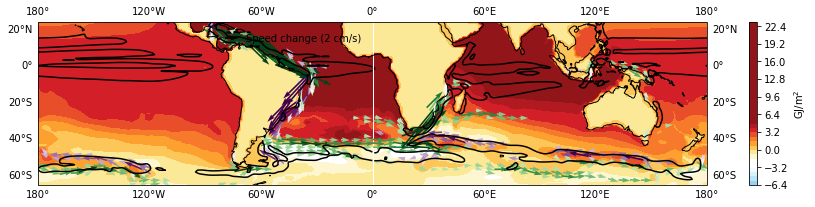

In [14]:
import matplotlib.colors as colors

fig = plt.figure(figsize=(15,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
qlon = np.arange(0,360)
qlat = np.arange(15,105)
#qlev = np.arange(0,35)
vm = 0.2
yr = 2

#lon_natl[0]=0.3

#tmp = SOB_tst[yr, qlat, :] - SOB_tst[yr-1, qlat, :] 
#tmp = SOB_tst[yr,qlat, :]
#tmp = NAtime_dh[yr, qlat, :]
#tmpu = np.transpose(u_ctl[:,qlat])
#plt.set_cmap('bwr')
#plt.set_cmap('YlOrBr')#("Oranges")
levels = np.linspace(-vm, vm, 41)

v_dep = np.arange(0,14) # approximately top 150 m 
# actually speed not mke whoops!
clim_mke = (np.nanmean(climaV[:,:, v_dep]**2,2) + np.nanmean(climaU[:,:, v_dep]**2,2))**0.5 
exp_mke = (np.nanmean(expaV_natl[:,:, v_dep]**2,2) + np.nanmean(expaU_natl[:,:, v_dep]**2,2))**0.5

du_dSST = expaU_natl - climaU
dv_dSST = expaV_natl - climaV
ohc1 = (expaT_natl - climaT)*dzq
expaOHC_natl = np.nansum(ohc1,2)*3850*1035/1e9

blk=6# zonal direction
blk2 =2 # meridional
du_dSST = np.nanmean(du_dSST[:,:,v_dep],2)
#du_dSST = du_dSST[qlon,:]
#du_dSST = du_dSST[:,qlat]
du_xr = xr.DataArray(du_dSST, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
du_xr = du_xr.isel(lon=qlon, lat=qlat)
pl_du = du_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_du = pl_du.coarsen(lat = blk2, boundary = 'trim').mean()

b = np.nanmean(dv_dSST[:,:,v_dep],2)
dv_xr = xr.DataArray(b, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
dv_xr = dv_xr.isel(lon=qlon, lat=qlat)
pl_dv = dv_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_dv = pl_dv.coarsen(lat = blk2, boundary = 'trim').mean()

# need a mask ot make anything too small be equal to nan
# could for loop it. There are also those masked array things that we can use. 
pl_du = xr.where(pl_du**2+pl_dv**2>0.0001, pl_du, np.nan)
pl_dv = xr.where(pl_du**2+pl_dv**2>0.0001, pl_dv, np.nan)

c = exp_mke-clim_mke
dsp_xr = xr.DataArray(c, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
dsp_xr = dsp_xr.isel(lon=qlon, lat=qlat)
pl_dsp = dsp_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_dsp = pl_dsp.coarsen(lat = blk2, boundary = 'trim').mean()

# 
clim_mke = clim_mke[qlon,:]
clim_mke = clim_mke[:,qlat]
#expaOHC_dSST
expaOHC_natl = expaOHC_natl[qlon,:]
expaOHC_natl = expaOHC_natl[:,qlat]

#tick_print = np.linspace(-10,10, 6, endpoint=True)
myclev = [0.1,0.3] 
C = ax.contour(lonq[qlon], latq[qlat], np.transpose(clim_mke), levels=myclev, colors='k')
#C2 = axs[1].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
#D = axs[0].quiver(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau1_udif_4.isel(z_t=idep).mean('z_t'), tau1_vdif_4.isel(z_t=idep).mean('z_t'))
plt.set_cmap(cmaps.BlueWhiteOrangeRed)#YlOrBr')#("Oranges")
Td = ax.contourf(lonq[qlon], latq[qlat],np.transpose(expaOHC_natl), norm = colors.Normalize(vmin=-10, vmax=5),levels=35)
plt.set_cmap('PRGn')
[y,x] = np.meshgrid( pl_du.lat,pl_du.lon)
D = ax.quiver( x,y, pl_du, pl_dv, pl_du,norm = colors.Normalize(vmin=-0.03, vmax=0.03), pivot='mid', scale = 1 )
ax.quiverkey(D,   X=0.3, Y=0.9, U=0.02, label='Speed change (2 cm/s)', labelpos='E')

cb = plt.colorbar(Td)
cb.set_label('GJ/m$^2$')

ax.set_aspect('auto')


#Q = plt.contourf( lon_natl[qlon],lat_natl[qlat], 100*tmp[:,qlon],levels=levels, extend='both', vmin = -vm, vmax= vm,
#          transform=ccrs.PlateCarree())
#plt.contour(lon_natl[qlon],lat_natl[qlat], tmpu[:,qlon], [0.1, 1], colors= 'green')
#plt.plot(hovr,umax-80 ,'yellow')
#plt.plot(SJFx, SJFy, color='yellow', linestyle = 'dashed')
#plt.plot(orsiSAFx, orsiSAFy, color='teal', linestyle = 'dashed')
#plt.plot(orsiSAFx-360, orsiSAFy, color='teal', linestyle = 'dashed')

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)

#plt.colorbar(Q)

This is honestly discouraging. i feel like I'm trying to prove a point that's not that important. There's a lot interesting stuff that happens when AMOC shuts down; the slowdown is weird for sure, but it's not totally crazy. 
Particularly concerning is the part where the OHC change up in the tropical Indian is way WAY larger than the change in the ARC-SAF region. This is not ideal. 
I feel like this is the big concern I have that I'm not totally happy with... the SSH change is more impressive than the OHC change which is sad. It may also be that one accumulates more than the other ... that could be worth looking at. 
I should probably make this OHC video, huh. That's been recommended for literally 3 months and I haven't done it... because it's not priority. 

<ipython-input-43-f212f5145ab4>:22: RuntimeWarning: Mean of empty slice
  clim_mke = (np.nanmean(climaV[:,:, v_dep]**2,2) + np.nanmean(climaU[:,:, v_dep]**2,2))**0.5
<ipython-input-43-f212f5145ab4>:23: RuntimeWarning: Mean of empty slice
  exp_mke = (np.nanmean(expaV_dSST[:,:, v_dep]**2,2) + np.nanmean(expaU_dSST[:,:, v_dep]**2,2))**0.5
<ipython-input-43-f212f5145ab4>:32: RuntimeWarning: Mean of empty slice
  du_dSST = np.nanmean(du_dSST[:,:,v_dep],2)
<ipython-input-43-f212f5145ab4>:40: RuntimeWarning: Mean of empty slice
  b = np.nanmean(dv_dSST[:,:,v_dep],2)


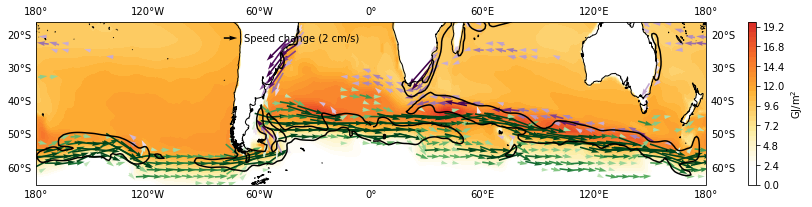

In [43]:
fig = plt.figure(figsize=(15,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
qlon = np.arange(0,360)
qlat = np.arange(15,65)
#qlev = np.arange(0,35)
vm = 0.2
yr = 2

#lon_natl[0]=0.3

#tmp = SOB_tst[yr, qlat, :] - SOB_tst[yr-1, qlat, :] 
#tmp = SOB_tst[yr,qlat, :]
#tmp = NAtime_dh[yr, qlat, :]
#tmpu = np.transpose(u_ctl[:,qlat])
#plt.set_cmap('bwr')
#plt.set_cmap('YlOrBr')#("Oranges")
levels = np.linspace(-vm, vm, 41)

v_dep = np.arange(0,14) # approximately top 150 m 
# actually speed not mke whoops!
clim_mke = (np.nanmean(climaV[:,:, v_dep]**2,2) + np.nanmean(climaU[:,:, v_dep]**2,2))**0.5 
exp_mke = (np.nanmean(expaV_dSST[:,:, v_dep]**2,2) + np.nanmean(expaU_dSST[:,:, v_dep]**2,2))**0.5

du_dSST = expaU_dSST - climaU
dv_dSST = expaV_dSST - climaV
ohc1 = (expaT_dSST - climaT)*dzq
expaOHC_dSST = np.nansum(ohc1,2)*3850*1035/1e9

blk=6# zonal direction
blk2 =2 # meridional
du_dSST = np.nanmean(du_dSST[:,:,v_dep],2)
#du_dSST = du_dSST[qlon,:]
#du_dSST = du_dSST[:,qlat]
du_xr = xr.DataArray(du_dSST, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
du_xr = du_xr.isel(lon=qlon, lat=qlat)
pl_du = du_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_du = pl_du.coarsen(lat = blk2, boundary = 'trim').mean()

b = np.nanmean(dv_dSST[:,:,v_dep],2)
dv_xr = xr.DataArray(b, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
dv_xr = dv_xr.isel(lon=qlon, lat=qlat)
pl_dv = dv_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_dv = pl_dv.coarsen(lat = blk2, boundary = 'trim').mean()

# need a mask ot make anything too small be equal to nan
# could for loop it. There are also those masked array things that we can use. 
pl_du = xr.where(pl_du**2+pl_dv**2>0.0001, pl_du, np.nan)
pl_dv = xr.where(pl_du**2+pl_dv**2>0.0001, pl_dv, np.nan)

c = exp_mke-clim_mke
dsp_xr = xr.DataArray(c, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
dsp_xr = dsp_xr.isel(lon=qlon, lat=qlat)
pl_dsp = dsp_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_dsp = pl_dsp.coarsen(lat = blk2, boundary = 'trim').mean()

# 
clim_mke = clim_mke[qlon,:]
clim_mke = clim_mke[:,qlat]
expaOHC_dSST
expaOHC_dSST = expaOHC_dSST[qlon,:]
expaOHC_dSST = expaOHC_dSST[:,qlat]

#tick_print = np.linspace(-10,10, 6, endpoint=True)
myclev = [0.1,0.3] 
C = ax.contour(lonq[qlon], latq[qlat], np.transpose(clim_mke), levels=myclev, colors='k')
#C2 = axs[1].contour(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], cont_speed_4.isel(z_t=idep).mean('z_t'), levels=myclev, colors='k')
#D = axs[0].quiver(tau4_um_4.TLONG[0,matlonc],tau4_um_4.TLAT[matlatc,0], tau1_udif_4.isel(z_t=idep).mean('z_t'), tau1_vdif_4.isel(z_t=idep).mean('z_t'))
plt.set_cmap(cmaps.BlueWhiteOrangeRed)#YlOrBr')#("Oranges")
Td = ax.contourf(lonq[qlon], latq[qlat],np.transpose(expaOHC_dSST), norm = colors.Normalize(vmin=-25, vmax=25),levels=35)
plt.set_cmap('PRGn')
[y,x] = np.meshgrid( pl_du.lat,pl_du.lon)
D = ax.quiver( x,y, pl_du, pl_dv, pl_du,norm = colors.Normalize(vmin=-0.03, vmax=0.03), pivot='mid', scale = 1 )
ax.quiverkey(D,   X=0.3, Y=0.9, U=0.02, label='Speed change (2 cm/s)', labelpos='E')

cb = plt.colorbar(Td)
cb.set_label('GJ/m$^2$')

ax.set_aspect('auto')


#Q = plt.contourf( lon_natl[qlon],lat_natl[qlat], 100*tmp[:,qlon],levels=levels, extend='both', vmin = -vm, vmax= vm,
#          transform=ccrs.PlateCarree())
#plt.contour(lon_natl[qlon],lat_natl[qlat], tmpu[:,qlon], [0.1, 1], colors= 'green')
#plt.plot(hovr,umax-80 ,'yellow')
#plt.plot(SJFx, SJFy, color='yellow', linestyle = 'dashed')
#plt.plot(orsiSAFx, orsiSAFy, color='teal', linestyle = 'dashed')
#plt.plot(orsiSAFx-360, orsiSAFy, color='teal', linestyle = 'dashed')

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)

#plt.colorbar(Q)

In [ ]:
#plt.set_cmap('afmhot_r')
#plt.contourf(np.transpose(expaOHC_dSST))

pl_du = xr.where(pl_du**2+pl_dv**2>0.0001, pl_du, np.nan)
plt.contourf(tst_du)
plt.colorbar()

In [17]:
cmaps.BlueWhiteOrangeRed

<ipython-input-23-8b3dd3a4f9db>:29: RuntimeWarning: Mean of empty slice
  clim_mke = (np.nanmean(climaV[:,:, v_dep]**2,2) + np.nanmean(climaU[:,:, v_dep]**2,2))**0.5
<ipython-input-23-8b3dd3a4f9db>:30: RuntimeWarning: Mean of empty slice
  dSSS_mke = (np.nanmean(expaV_dSSS[:,:, v_dep]**2,2) + np.nanmean(expaU_dSSS[:,:, v_dep]**2,2))**0.5
<ipython-input-23-8b3dd3a4f9db>:31: RuntimeWarning: Mean of empty slice
  dSST_mke = (np.nanmean(expaV_dSST[:,:, v_dep]**2,2) + np.nanmean(expaU_dSST[:,:, v_dep]**2,2))**0.5
<ipython-input-23-8b3dd3a4f9db>:58: RuntimeWarning: Mean of empty slice
  du_dSST = np.nanmean(du_dSST[:,:,v_dep],2)
<ipython-input-23-8b3dd3a4f9db>:66: RuntimeWarning: Mean of empty slice
  b = np.nanmean(dv_dSST[:,:,v_dep],2)
<ipython-input-23-8b3dd3a4f9db>:93: RuntimeWarning: Mean of empty slice
  du_dSSS = np.nanmean(du_dSSS[:,:,v_dep],2)
<ipython-input-23-8b3dd3a4f9db>:100: RuntimeWarning: Mean of empty slice
  b = np.nanmean(dv_dSSS[:,:,v_dep],2)
<ipython-input-23-8b3dd3a4f9d

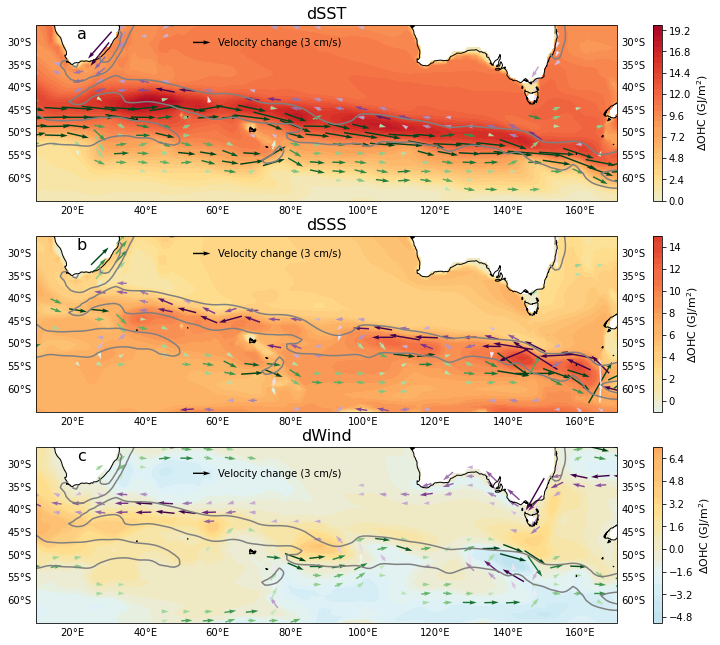

In [23]:
# Fig 3.


a = np.load('ARC-SAF_coords.npz')
ARCSAF_x = a['ARCSAF_x']
ARCSAF_y = a['ARCSAF_y']

fig,axs = plt.subplots(nrows=3, ncols=1, figsize=(13,11),subplot_kw={'projection': ccrs.PlateCarree()}, )
#axs = plt.axes(projection=ccrs.PlateCarree())
#axs.coastlines()
qlon = np.arange(0,180)
qlat = np.arange(15,55)
#qlev = np.arange(0,35)
vm = 0.2
yr = 2

#lon_natl[0]=0.3

#tmp = SOB_tst[yr, qlat, :] - SOB_tst[yr-1, qlat, :] 
#tmp = SOB_tst[yr,qlat, :]
#tmp = NAtime_dh[yr, qlat, :]
#tmpu = np.transpose(u_ctl[:,qlat])
#plt.set_cmap('bwr')
#plt.set_cmap('YlOrBr')#("Oranges")
levels = np.linspace(-vm, vm, 41)

v_dep = np.arange(0,14) # approximately top 150 m 
# actually speed not mke whoops! # not using this that much now. 
clim_mke = (np.nanmean(climaV[:,:, v_dep]**2,2) + np.nanmean(climaU[:,:, v_dep]**2,2))**0.5 
dSSS_mke = (np.nanmean(expaV_dSSS[:,:, v_dep]**2,2) + np.nanmean(expaU_dSSS[:,:, v_dep]**2,2))**0.5
dSST_mke = (np.nanmean(expaV_dSST[:,:, v_dep]**2,2) + np.nanmean(expaU_dSST[:,:, v_dep]**2,2))**0.5

du_dSSS = expaU_dSSS - climaU
dv_dSSS = expaV_dSSS - climaV

du_dSST = expaU_dSST - climaU
dv_dSST = expaV_dSST - climaV

du_dWind = expaU_dWind - climaU
dv_dWind = expaV_dWind - climaV

ohc1 = (expaT_dSSS - climaT)*dzq
expaOHC_dSSS = np.nansum(ohc1,2)*3850*1035/1e9
ohc2 = (expaT_dSST - climaT)*dzq
expaOHC_dSST = np.nansum(ohc2,2)*3850*1035/1e9

ohc3 = (expaT_dWind - climaT)*dzq
expaOHC_dWind = np.nansum(ohc3,2)*3850*1035/1e9

expaOHC_dWind = np.where( expaOHC_dWind!=0, expaOHC_dWind,np.nan )
expaOHC_dSSS= np.where( expaOHC_dSSS!=0, expaOHC_dSSS, np.nan,)
expaOHC_dSST= np.where( expaOHC_dSST!=0, expaOHC_dSST, np.nan, )

## chunk for SST

blk=6# zonal direction
blk2 =2 # meridional
du_dSST = np.nanmean(du_dSST[:,:,v_dep],2)
#du_dSST = du_dSST[qlon,:]
#du_dSST = du_dSST[:,qlat]
du_xr = xr.DataArray(du_dSST, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
du_xr = du_xr.isel(lon=qlon, lat=qlat)
pl_du_SST = du_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_du_SST = pl_du_SST.coarsen(lat = blk2, boundary = 'trim').mean()

b = np.nanmean(dv_dSST[:,:,v_dep],2)
dv_xr = xr.DataArray(b, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
dv_xr = dv_xr.isel(lon=qlon, lat=qlat)
pl_dv_SST = dv_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_dv_SST = pl_dv_SST.coarsen(lat = blk2, boundary = 'trim').mean()

# need a mask ot make anything too small be equal to nan
# could for loop it. There are also those masked array things that we can use. 
pl_du_SST = xr.where(pl_du_SST**2+pl_dv_SST**2>0.0001, pl_du_SST, np.nan)
pl_dv_SST = xr.where(pl_du_SST**2+pl_dv_SST**2>0.0001, pl_dv_SST, np.nan)

#cSST = dSST_mke-clim_mke
#dsp_xr = xr.DataArray(c, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
#dsp_xr = dsp_xr.isel(lon=qlon, lat=qlat)
#pl_dsp_SST = dsp_xr.coarsen(lon = blk, boundary = 'trim').mean()
#pl_dsp_SST = pl_dsp_SST.coarsen(lat = blk2, boundary = 'trim').mean()
#
# indexing
clim_mke = clim_mke[qlon,:]
clim_mke = clim_mke[:,qlat]
expaOHC_dSST = expaOHC_dSST[qlon,:]
expaOHC_dSST = expaOHC_dSST[:,qlat]

## chunk for _SSS 

blk=6# zonal direction
blk2 =2 # meridional
du_dSSS = np.nanmean(du_dSSS[:,:,v_dep],2)

du_xr = xr.DataArray(du_dSSS, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
du_xr = du_xr.isel(lon=qlon, lat=qlat)
pl_du_SSS = du_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_du_SSS = pl_du_SSS.coarsen(lat = blk2, boundary = 'trim').mean()

b = np.nanmean(dv_dSSS[:,:,v_dep],2)
dv_xr = xr.DataArray(b, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
dv_xr = dv_xr.isel(lon=qlon, lat=qlat)
pl_dv_SSS = dv_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_dv_SSS = pl_dv_SSS.coarsen(lat = blk2, boundary = 'trim').mean()

pl_du_SSS = xr.where(pl_du_SSS**2+pl_dv_SSS**2>0.0001, pl_du_SSS, np.nan)
pl_dv_SSS = xr.where(pl_du_SSS**2+pl_dv_SSS**2>0.0001, pl_dv_SSS, np.nan)

#c = exp_SSS-clim_mke
#dsp_xr = xr.DataArray(c, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
#dsp_xr = dsp_xr.isel(lon=qlon, lat=qlat)
#pl_dsp_SSS = dsp_xr.coarsen(lon = blk, boundary = 'trim').mean()
#pl_dsp_SSS = pl_dsp_SSS.coarsen(lat = blk2, boundary = 'trim').mean()

# indexing

expaOHC_dSSS = expaOHC_dSSS[qlon,:]
expaOHC_dSSS = expaOHC_dSSS[:,qlat]

### eventually a place for wind also! 
blk=6# zonal direction
blk2 =2 # meridional
du_dWind = np.nanmean(du_dWind[:,:,v_dep],2)
du_xr = xr.DataArray(du_dWind, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
du_xr = du_xr.isel(lon=qlon, lat=qlat)
pl_du_dWind = du_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_du_dWind = pl_du_dWind.coarsen(lat = blk2, boundary = 'trim').mean()

b = np.nanmean(dv_dWind[:,:,v_dep],2)
dv_xr = xr.DataArray(b, dims = ['lon','lat'], coords = dict(lon =(["lon"], lonq), lat=(['lat'], latq)))
dv_xr = dv_xr.isel(lon=qlon, lat=qlat)
pl_dv_dWind = dv_xr.coarsen(lon = blk, boundary = 'trim').mean()
pl_dv_dWind = pl_dv_dWind.coarsen(lat = blk2, boundary = 'trim').mean()

# need a mask ot make anything too small be equal to nan
# could for loop it. There are also those masked array things that we can use. 
pl_du_dWind = xr.where(pl_du_dWind**2+pl_dv_dWind**2>0.0001, pl_du_dWind, np.nan)
pl_dv_dWind = xr.where(pl_du_dWind**2+pl_dv_dWind**2>0.0001, pl_dv_dWind, np.nan)

expaOHC_dWind = expaOHC_dWind[qlon,:]
expaOHC_dWind = expaOHC_dWind[:,qlat]


# changed contours to gray
myclev = [0.1,0.3] 
C = axs[0].contour(lonq[qlon], latq[qlat], np.transpose(clim_mke), levels=myclev, colors='gray')
C2 = axs[1].contour(lonq[qlon], latq[qlat], np.transpose(clim_mke), levels=myclev, colors='gray')
C2 = axs[2].contour(lonq[qlon], latq[qlat], np.transpose(clim_mke), levels=myclev, colors='gray')

plt.set_cmap(cmaps.cmp_b2r)#YlOrBr')#("Oranges")
OHv = 20
Td = axs[0].contourf(lonq[qlon], latq[qlat],np.transpose(expaOHC_dSST), norm = colors.Normalize(vmin=-OHv, vmax=OHv),levels=35)
Td2 = axs[1].contourf(lonq[qlon], latq[qlat],np.transpose(expaOHC_dSSS), norm = colors.Normalize(vmin=-OHv, vmax=OHv),levels=35)
Td3 = axs[2].contourf(lonq[qlon], latq[qlat],np.transpose(expaOHC_dWind), norm = colors.Normalize(vmin=-OHv, vmax=OHv),levels=35)


plt.set_cmap('PRGn')
[y,x] = np.meshgrid( pl_du_SST.lat,pl_du_SST.lon)
D = axs[0].quiver( x,y, pl_du_SST, pl_dv_SST, pl_du_SST,scale= 1, norm = colors.Normalize(vmin=-0.03, vmax=0.03), pivot='mid' )
D2 = axs[1].quiver( x,y, pl_du_SSS, pl_dv_SSS, pl_du_SSS,scale= 1, norm = colors.Normalize(vmin=-0.03, vmax=0.03), pivot='mid' )
D3 = axs[2].quiver( x,y, pl_du_dWind, pl_dv_dWind, pl_du_dWind,scale = 1, norm = colors.Normalize(vmin=-0.03, vmax=0.03), pivot='mid' )

axs[0].quiverkey(D,   X=0.3, Y=0.9, U=0.03, label='Velocity change (3 cm/s)', labelpos='E')
axs[1].quiverkey(D2,   X=0.3, Y=0.9, U=0.03, label='Velocity change (3 cm/s)', labelpos='E')
axs[2].quiverkey(D3,   X=0.3, Y=0.85, U=0.03, label='Velocity change (3 cm/s)', labelpos='E')


cb = plt.colorbar(Td, ax=axs[0])
cb2 = plt.colorbar(Td2, ax=axs[1])
cb3 = plt.colorbar(Td3, ax=axs[2])
cb.set_label(label = '$\Delta$OHC (GJ/m$^2$)', size=11)
cb2.set_label(label = '$\Delta$OHC (GJ/m$^2$)', size=11)
cb3.set_label(label = '$\Delta$OHC (GJ/m$^2$)', size=11)
#
axs[0].set_aspect('auto')
axs[1].set_aspect('auto')

#axs[0].plot(ARCSAF_x[2:], ARCSAF_y[2:], color='teal')

axs[0].set_title('dSST', size=16)   
axs[1].set_title('dSSS', size=16) 
axs[2].set_title('dWind', size=16) 
plabels =['a','b','c']
for j in range(3):
    axs[j].set_aspect('auto')
    axs[j].coastlines()
    #axs[j].plot(ARCSAF_x[2:], ARCSAF_y[2:], '--')
    gl = axs[j].gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
    gl.top_labels = False
    axs[j].set_xlim([10,170])


    axs[j].text(0.07, 0.92, plabels[j], size = 16, transform = axs[j].transAxes)
    # could set xlim to 10 and 170??? 
    
    # set gl = axs[] to adjust labels etc. 

#Q = plt.contourf( lon_natl[qlon],lat_natl[qlat], 100*tmp[:,qlon],levels=levels, extend='both', vmin = -vm, vmax= vm,
#          transform=ccrs.PlateCarree())
#plt.contour(lon_natl[qlon],lat_natl[qlat], tmpu[:,qlon], [0.1, 1], colors= 'green')
#plt.plot(hovr,umax-80 ,'yellow')
#plt.plot(SJFx, SJFy, color='yellow', linestyle = 'dashed')
#plt.plot(orsiSAFx, orsiSAFy, color='teal', linestyle = 'dashed')
#plt.plot(orsiSAFx-360, orsiSAFy, color='teal', linestyle = 'dashed')

plt.savefig('SISAZ_figures/MITgcm_fullmap_12-18.eps')
#plt.colorbar(Q)

## revisions work

In [ ]:
# key points: 
# there's not enough here. 

In [177]:

depq = np.squeeze(SSSf['depth'])
latq = np.squeeze(SSSf['latinterp'])
lonq = np.squeeze(SSSf['loninterp'])


tmp = np.diff(depq)
dzq = np.append([10], tmp)

ohc2 = (expaT_dSSS - climaT)*dzq
expaOHC_dSSS = np.nansum(ohc2,2)*3850*1035/1e9
expaOHC_dSSS.shape

(360, 161)

TypeError: Length of x (360) must match number of columns in z (180)

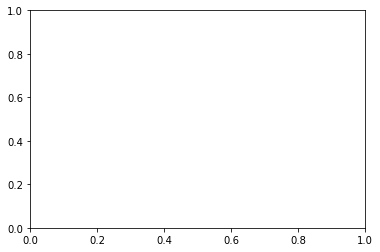

In [176]:
qlon = np.arange(0,360)
qlat = np.arange(0)
OHv = 30
plt.set_cmap('bwr')
plt.contourf(lonq, latq,np.transpose(expaOHC_dSSS), vmin=-OHv, vmax=OHv,levels=35)
plt.colorbar()

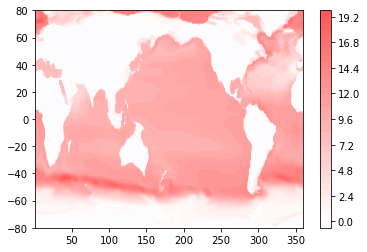

In [174]:
ohc1 = (expaT_dSST - climaT)*dzq
expaOHC_dSST = np.nansum(ohc1,2)*3850*1035/1e9
expaOHC_dSST.shape

qlon = np.arange(0,360)
qlat = np.arange(0)
OHv = 30
plt.set_cmap('bwr')
plt.contourf(lonq, latq,np.transpose(expaOHC_dSST), vmin=-OHv, vmax=OHv,levels=35)
plt.colorbar()

In [27]:
OHCdA_SST = expaOHC_dSST*np.sin(np.pi/180 * np.arange(10,171))*1.1e5**2
OHCdA_SSS = expaOHC_dSSS*np.sin(np.pi/180 * np.arange(10,171))*1.1e5**2

In [32]:
sum(sum(OHCdA_SSS))*1e-15

2.3287262211118445

In [33]:
sum(sum(OHCdA_SST))*1e-15

3.1404084264598904

In [ ]:
## OK trying to construct the figure ...
# what's the order: OHC globally! 
# then notice the heat flux is massive in the North Atlantic. 
# This is associated with a large forced decrease in surface density. 
# the original design is reasonable. I can use each of those figures. 
# OHC dSST , dSSS global
# t flux global
# wintertime surface density anomaly North Atlantic - drives reduced bottom water convection. 
# then FAF comparison, which isn't great but is there to show contrast. That's a fine supp fig. 

In [186]:
sstfl=sio.loadmat('/nfs/data/OGCM/heatfluxsstexplast40years.mat')
sssfl=sio.loadmat('/nfs/data/OGCM/heatfluxsssexplast40years.mat')

In [187]:
sstfwf = sstfl['empmeanwarminginterp']
climfwf = sstfl['empmeaninterp']
ssthf = sstfl['qnetmeanwarminginterp']
climhf = sstfl['qnetmeaninterp']
ssttf = sstfl['tfluxmeanwarminginterp']
climtf = sstfl['tfluxmeaninterp']
sssfwf = sssfl['empmeanwarminginterp']
climsfwf = sssfl['empmeaninterp']
ssshf = sssfl['qnetmeanwarminginterp']
climshf = sssfl['qnetmeaninterp']
ssstf = sssfl['tfluxmeanwarminginterp']
climstf = sssfl['tfluxmeaninterp']

In [190]:
sssdhf = np.nanmean(ssstf,2) - np.nanmean(climstf,2)
sstdtf = np.nanmean(ssttf,2) - np.nanmean(climtf,2)

<ipython-input-190-53acb56a6e90>:1: RuntimeWarning: Mean of empty slice
  sssdhf = np.nanmean(ssstf,2) - np.nanmean(climstf,2)
<ipython-input-190-53acb56a6e90>:2: RuntimeWarning: Mean of empty slice
  sstdtf = np.nanmean(ssttf,2) - np.nanmean(climtf,2)


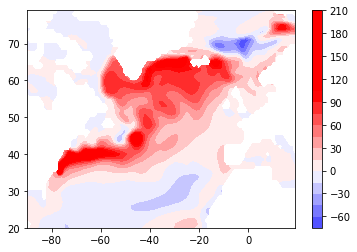

In [189]:
plt.set_cmap('bwr')
mylat = np.arange(100,160)
mylon = np.concatenate([np.arange(-90,0), np.arange(0,20)])
toPl = sssdhf[mylon, :]
toPl = toPl[:, mylat]
plt.contourf(mylon, mylat-80, np.transpose(toPl), vmin = -100, vmax = 100, levels = 20)
plt.colorbar()

In [24]:
# I'm interested in finding the forcing files. 

asdf = sio.loadmat('Qihua_MITgcm/surfaceforcingtermsforBen.mat')

In [29]:
delsst = asdf['tosdiffmean']
delsss = asdf['sosdiffmean']

In [52]:
asdf['latinterp']

array([[-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
        -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
        -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
        -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
        -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
        -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
        -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
        -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
        -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
         -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
          0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
      

In [39]:
# need to grab the climatological value of the SST and SSS. Where is that? 
# check SSSf
climT = SSSf['temp4dmeaninterp']
climS = SSSf['salt4dmeaninterp']


In [40]:
climSST = climT[:,:,0,:]
climSSS = climS[:,:,0,:]

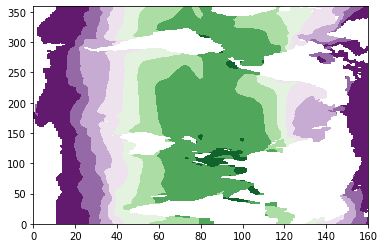

In [42]:
plt.contourf(climSST[:,:,5])

In [217]:
natlx = np.arange(-80,20)
natly = np.arange(110,161)
natlxq = natlx
natlyq = natly
mon = np.arange(12)

tmpsal = climSST[natlx, :,:]
tmpsal = np.mean(tmpsal[:,:,mon],2)
climnt = tmpsal[:,natly]

tmp = delsst[:,10:171,:] + climSST
tmpsal = tmp[natlx, :,:]
tmpsal = np.mean(tmpsal[:,:,mon],2)
dSSTnt = tmpsal[:,natly]

tmpsal = climSSS[natlx, :,:]
tmpsal = np.mean(tmpsal[:,:,mon],2)
climns = tmpsal[:,natly]

tmp = delsss[:,10:171,:] + climSSS
tmpsal = tmp[natlx, :,:]
tmpsal = np.mean(tmpsal[:,:,mon],2)
dSSSns = tmpsal[:,natly]
#dsstsd = 


climsd = gsw.sigma0(climns, climnt )
dsstsd = gsw.sigma0(climns, dSSTnt )
dssssd = gsw.sigma0(dSSSns, climnt )
dbuoysd = gsw.sigma0(dSSSns, dSSTnt )

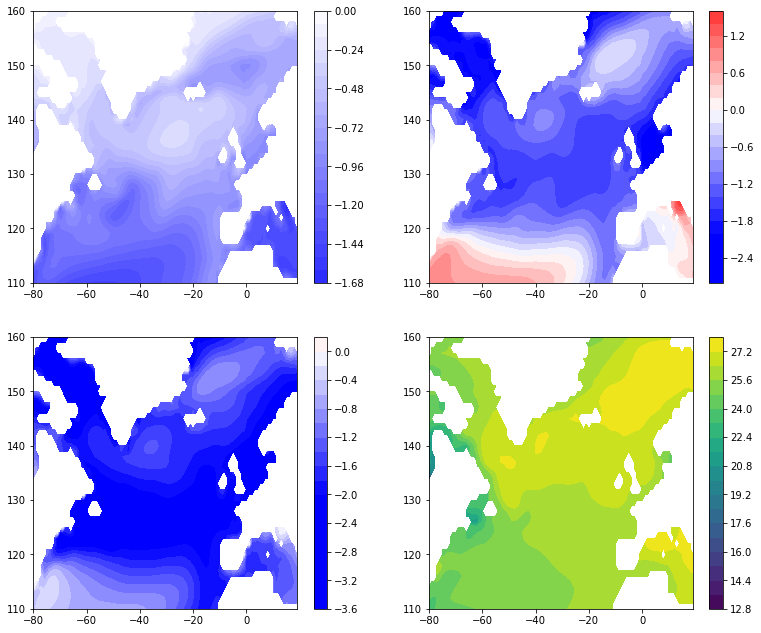

In [218]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (13,11))
A = axs[0,0].contourf(natlx, natly, np.transpose(dsstsd-climsd), vmin = -2, vmax= 2, cmap = 'bwr', levels=20)
plt.colorbar(A, ax = axs[0,0])
B = axs[0,1].contourf(natlx, natly, np.transpose(dssssd-climsd), vmin = -2, vmax= 2, cmap = 'bwr', levels=20)
plt.colorbar(B, ax = axs[0,1])
C = axs[1,0].contourf(natlx, natly, np.transpose(dbuoysd-climsd), vmin = -2, vmax= 2, cmap = 'bwr', levels=20)
plt.colorbar(C, ax = axs[1,0])
D = axs[1,1].contourf(natlx, natly, np.transpose(climsd),  cmap = 'viridis', levels=20)
plt.colorbar(D, ax = axs[1,1])

In [ ]:
## so now I need to the same calculation for the ocean-only FAFMIP. Let's do this in the next 15-20 minutes! 
# some of the files are a bit big though. 
# I think I have the MOM6 files I need ... but I might not actually. Let's see! I don't. Cool. That's why it's good to check! 
# Alright let's get it out the door. 

# Lynne's question about the warming patterns for NATL vs INDP. 
# I think this is very straightforward. Yes. The thing is this: there is a definite local heat max near the ARC-SAF in both. 
# The NATL has it more exactly on; in Indo-P is a bit to the north, reflecting more of a passive dynamic .. 
# then download the files that are updated and implement those in the overleaf. Good and easy! Done. 

In [ ]:
# this next bit is not too captivating ... 


In [86]:
climso = xr.open_dataarray('/zdata/mana/bataylor/OFAFMIP/MOM5/so_yr_MOM5_FAF-control_01-70.nc')
fheatso = xr.open_dataset('/zdata/mana/bataylor/OFAFMIP/MOM5/so_yr_MOM5_FAF-heat_01-70.nc')
fwaterso = xr.open_dataset('/zdata/mana/bataylor/OFAFMIP/MOM5/so_yr_MOM5_FAF-water_01-70.nc')

In [133]:
fcsss = climso.isel(depth=0, time = np.arange(60,70)).mean('time')
fhsss = fheatso.isel(depth=0, time = np.arange(60,70)).mean('time')
fssss = fwaterso.isel(depth=0, time = np.arange(60,70)).mean('time')


fcsss = fcsss.where(fcsss<1000)
fhsss = fhsss.where(fcsss<1000)
fssss = fssss.where(fcsss<1000)

In [91]:
climto = xr.open_dataset('/zdata/mana/bataylor/OFAFMIP/MOM5/thetao_yr_MOM5_FAF-control_01-70.nc')
fheatto = xr.open_dataset('/zdata/mana/bataylor/OFAFMIP/MOM5/thetao_yr_MOM5_FAF-heat_r1i1p1_1-70.nc')
fwaterto = xr.open_dataset('/zdata/mana/bataylor/OFAFMIP/MOM5/thetao_yr_MOM5_FAF-water_01-70.nc')

In [156]:
fcsst = climto.isel(depth=0, time = np.arange(60,70)).mean('time')
fhsst = fheatto.isel(depth=0, time = np.arange(60,70)).mean('time')
fssst = fwaterto.temp.isel(depth=0, time = np.arange(60,70)).mean('time')

fcsst = fcsst.where(fcsst<1000)
fhsst = fhsst.where(fcsst<1000)
fssst = fssst.where(fcsst<1000)

In [147]:
f

<xarray.Dataset>
Dimensions:   (time: 70, depth: 50, yt_ocean: 200, xt_ocean: 360)
Coordinates:
  * time      (time) object 2189-06-25 12:00:00 ... 2258-06-25 12:00:00
  * depth     (depth) float64 5.0 15.0 25.0 ... 4.588e+03 4.95e+03 5.316e+03
  * yt_ocean  (yt_ocean) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
Data variables:
    temp      (time, depth, yt_ocean, xt_ocean) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.0 (http://m...
    CDO:                       Climate Data Operators version 1.9.0 (http://m...
    filename:                  ocean_diag.nc
    grid_tile:                 N/A
    grid_type:                 regular
    history:                   Tue Nov 12 15:19:00 2019: cdo merge u_Blaker_F...
    nco_openmp_thread_number:  1
    time_avg_info:             average_T1,average_T2,average_DT
    title:                     MOM_BLAKER
    Conventions:               CF-1.5

In [221]:
natlx = np.arange(200,300)
natly = np.arange(140,190)
mon = np.arange(7,8)



fcsd = gsw.sigma0(fcsss.isel(xt_ocean = natlx, yt_ocean = natly), fcsst.sea_water_potential_temperature.isel(xt_ocean = natlx, yt_ocean = natly))
fhsd = gsw.sigma0(fhsss.salt.isel(xt_ocean = natlx, yt_ocean = natly), fhsst.sea_water_potential_temperature.isel(xt_ocean = natlx, yt_ocean = natly))
fssd = gsw.sigma0(fssss.salt.isel(xt_ocean = natlx, yt_ocean = natly), fssst.sea_water_potential_temperature.isel(xt_ocean = natlx, yt_ocean = natly))


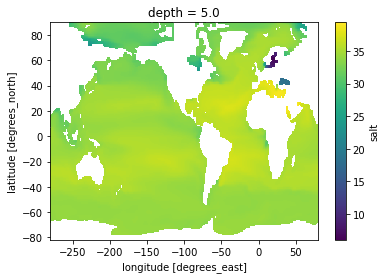

In [138]:
fcsss.plot()

In [223]:
hdif = fhsd - fcsd
sdif = fssd - fcsd

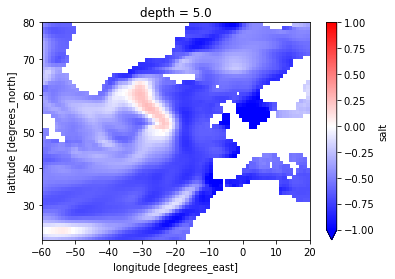

In [168]:
hdif.plot(vmin=-1, vmax=1, cmap= 'bwr')

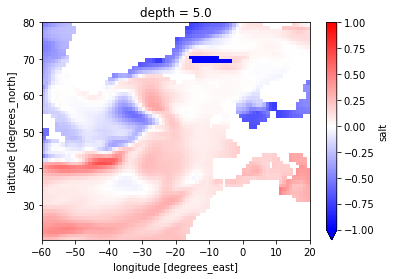

In [196]:
sdif.plot(vmin=-1, vmax=1, cmap= 'bwr')

In [ ]:
# Ok there's a massive adjustment in the north Atlantic. 
# importantly... there is a restoration of temperature in the North Atlantic. 
# When AMOC slows, there is not as much heat transport; when you are still restoring to climatology
# that creates large heat fluxes into the north atlantic. 
# I think it's interesting that there is not as much heat from the dSST run. is that true? 
# Let's look at North Atlantic sections?? 

# when we fix SSS to the values that we expect - the SSS will not change as strongly 
# thus the AMOC might not slow as much? Is that true? That's a little wild if so ... 

(180, 40)

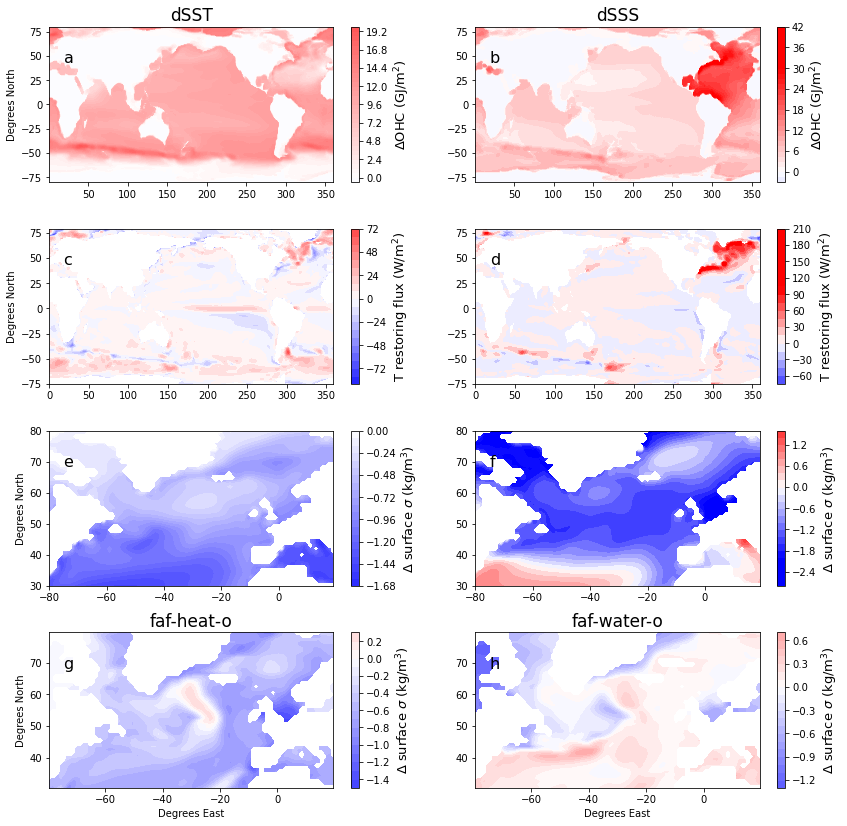

In [245]:
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize= (14,14))

latq = np.squeeze(SSSf['latinterp'])
lonq = np.squeeze(SSSf['loninterp'])

OHT = axs[0,0].contourf(lonq, latq,np.transpose(expaOHC_dSST), vmin=-OHv, vmax=OHv,levels=35)
cb0 = plt.colorbar(OHT, ax = axs[0,0])
OHS = axs[0,1].contourf(lonq, latq,np.transpose(expaOHC_dSSS), vmin=-OHv, vmax=OHv,levels=35)
cb1 = plt.colorbar(OHS, ax = axs[0,1])
cb1.set_label(label = '$\Delta$OHC (GJ/m$^2$)', size=13)
cb0.set_label(label = '$\Delta$OHC (GJ/m$^2$)', size=13)


mylat = np.arange(5,160)
mylon = np.concatenate([np.arange(0,360)])#, np.arange(0,200)])

toPl = sstdtf[mylon, :]
toPl = toPl[:, mylat]
HS = axs[1,0].contourf(mylon, mylat-80, np.transpose(toPl), vmin = -100, vmax = 100, levels = 20)
cb2 = plt.colorbar(HS, ax = axs[1,0])


toPl = sssdhf[mylon, :]
toPl = toPl[:, mylat]
HT = axs[1,1].contourf(mylon, mylat-80, np.transpose(toPl), vmin = -100, vmax = 100, levels = 20)
cb3 = plt.colorbar(HT, ax = axs[1,1])

cb3.set_label(label = 'T restoring flux (W/m$^2$)', size=13)
cb2.set_label(label = 'T restoring flux (W/m$^2$)', size=13)

A = axs[2,0].contourf(natlxq, natlyq-80, np.transpose(dsstsd-climsd), vmin = -2, vmax= 2, cmap = 'bwr', levels=20)
cb4 = plt.colorbar(A, ax = axs[2,0])
B = axs[2,1].contourf(natlxq, natlyq-80, np.transpose(dssssd-climsd), vmin = -2, vmax= 2, cmap = 'bwr', levels=20)
cb5 = plt.colorbar(B, ax = axs[2,1])
cb4.set_label(label = '$\Delta$ surface $\sigma$ (kg/m$^3$)', size=13)
cb5.set_label(label = '$\Delta$ surface $\sigma$ (kg/m$^3$)', size=13)


AF = axs[3,0].contourf(fssss.xt_ocean[natlx], fssss.yt_ocean[natly], hdif, vmin = -2, vmax= 2, cmap = 'bwr', levels=20)
cb6=plt.colorbar(AF, ax = axs[3,0])
sdif = sdif.where(np.abs(sdif)<10)
BF = axs[3,1].contourf(fssss.xt_ocean[natlx], fssss.yt_ocean[natly], sdif, vmin = -2, vmax= 2, cmap = 'bwr', levels=20)
cb7=plt.colorbar(BF, ax = axs[3,1])
cb6.set_label(label = '$\Delta$ surface $\sigma$ (kg/m$^3$)', size=13)
cb7.set_label(label = '$\Delta$ surface $\sigma$ (kg/m$^3$)', size=13)

axs[3,0].set_xlabel('Degrees East',fontsize = 'medium')
axs[3,1].set_xlabel('Degrees East',fontsize = 'medium')
axs[0,0].set_ylabel('Degrees North',fontsize = 'medium')
axs[1,0].set_ylabel('Degrees North',fontsize = 'medium')
axs[2,0].set_ylabel('Degrees North',fontsize = 'medium')
axs[3,0].set_ylabel('Degrees North',fontsize = 'medium')

axs[0,0].set_title('dSST',size = 17)
axs[0,1].set_title('dSSS',size = 17)

axs[3,0].set_title('faf-heat-o',size = 17)
axs[3,1].set_title('faf-water-o',size = 17)

plabels = ['a','b', 'c', 'd','e','f','g','h',]
for i in range(8):#np.arange(0,8):#[2,4,6]:
    j = i//2
    k = i%2 
    axs[j,k].text(0.05, 0.77, plabels[i], size = 16, transform = axs[j,k].transAxes)

plt.subplots_adjust(hspace=0.3)

plt.savefig('SISAZ_figures/Suppl_12-26.eps')
plt.savefig('SISAZ_figures/Suppl_12-26.jpg')
#hdif.plot(vmin=-1, vmax=1, cmap= 'bwr')